# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:03:23.210269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:03:26.147121
2025-04-15 00:03:26.147121


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:03:21"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

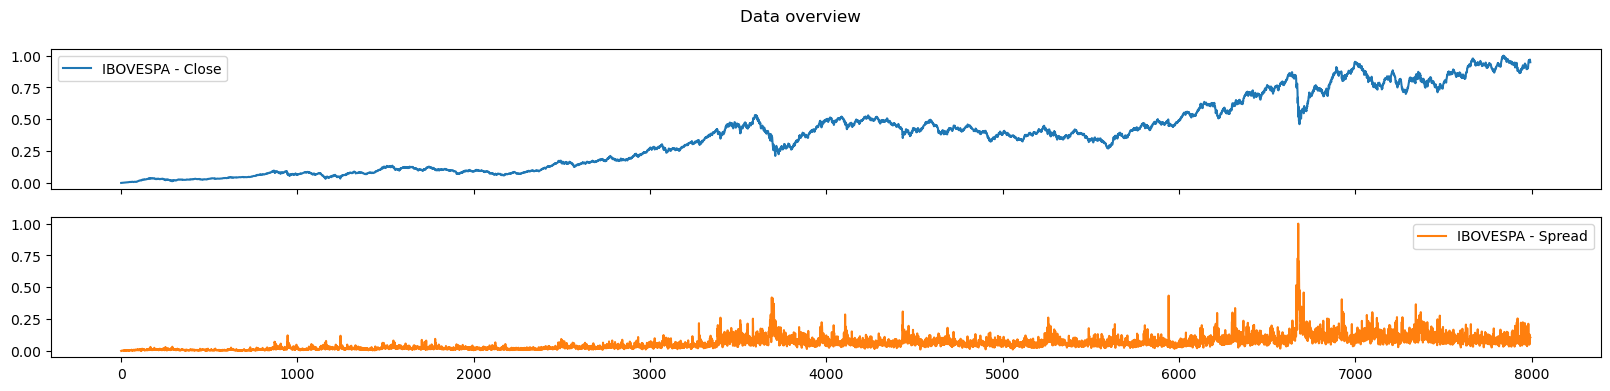

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

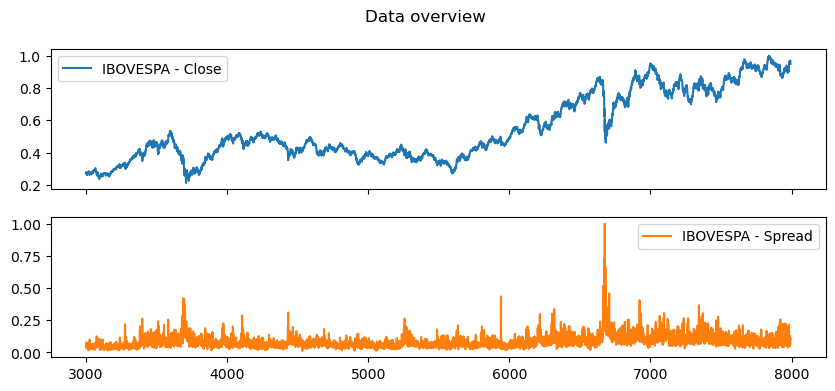

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

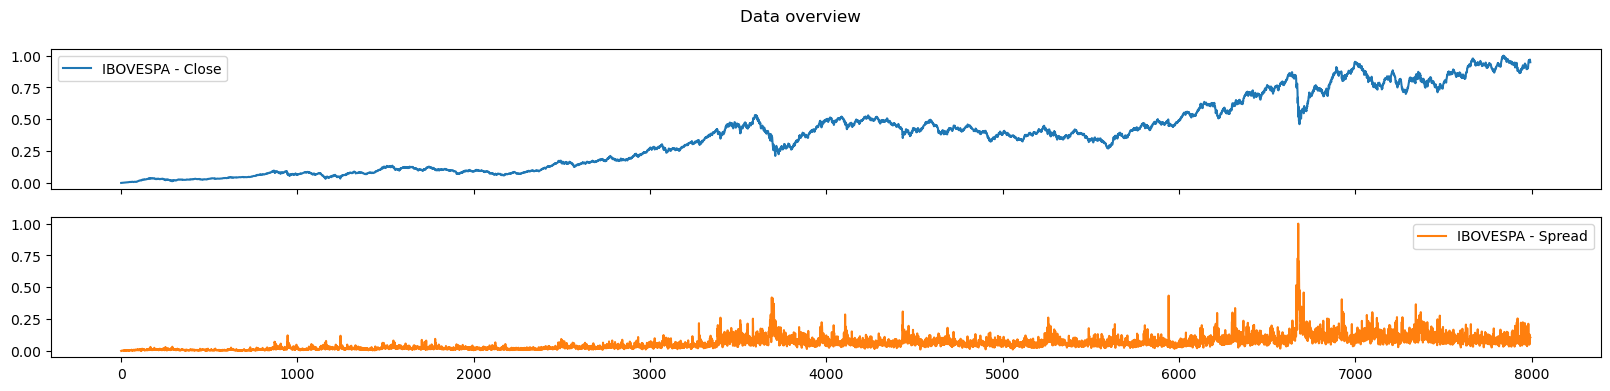

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

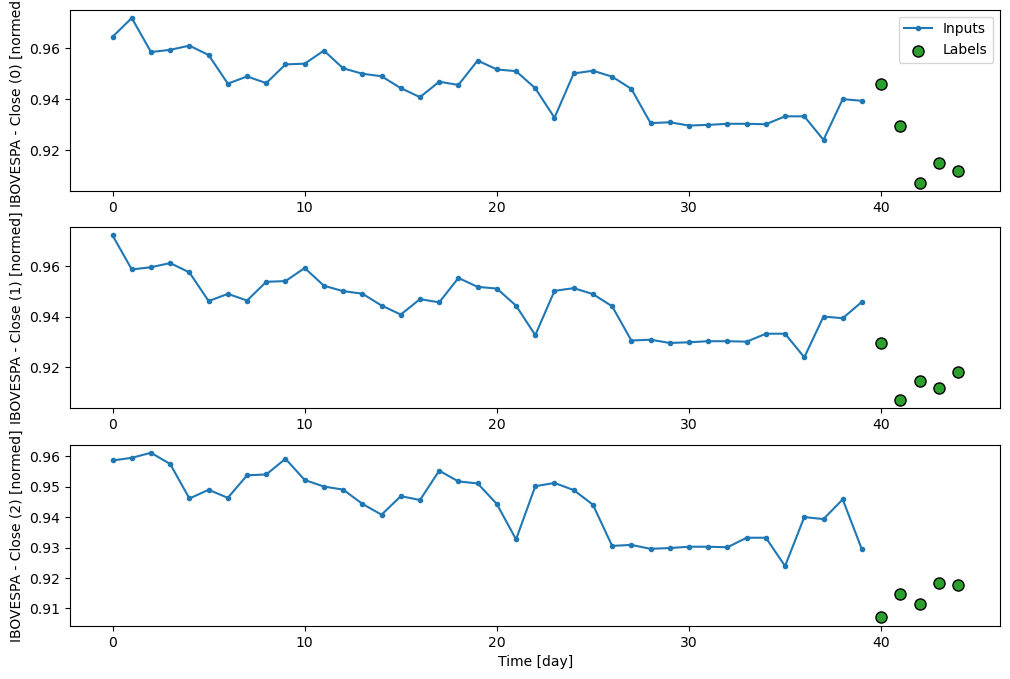

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15:13 4s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.9379 - mean_squared_error: 4.3757e-05 - root_mean_squared_error: 0.0066  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 59.8018 - mean_squared_error: 5.7927e-05 - root_mean_squared_error: 0.0075

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 52.7699 - mean_squared_error: 5.9425e-05 - root_mean_squared_error: 0.0076

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 49.0163 - mean_squared_error: 6.0913e-05 - root_mean_squared_error: 0.0077

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 46.5304 - mean_squared_error: 6.2431e-05 - root_mean_squared_error: 0.0078

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 44.4326 - mean_squared_error: 6.2693e-05 - root_mean_squared_error: 0.0079

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 42.6801 - mean_squared_error: 6.2509e-05 - root_mean_squared_error: 0.0079

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 41.0157 - mean_squared_error: 6.1658e-05 - root_mean_squared_error: 0.0078

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 39.4316 - mean_squared_error: 6.0428e-05 - root_mean_squared_error: 0.0077

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 37.9474 - mean_squared_error: 5.9012e-05 - root_mean_squared_error: 0.0076

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 36.5934 - mean_squared_error: 5.7712e-05 - root_mean_squared_error: 0.0076

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 35.4017 - mean_squared_error: 5.6957e-05 - root_mean_squared_error: 0.0075

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 34.3460 - mean_squared_error: 5.7554e-05 - root_mean_squared_error: 0.0075

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.4998 - mean_squared_error: 6.1404e-05 - root_mean_squared_error: 0.0078

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 32.7615 - mean_squared_error: 6.5505e-05 - root_mean_squared_error: 0.0080

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 32.1023 - mean_squared_error: 6.9782e-05 - root_mean_squared_error: 0.0082

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 31.5029 - mean_squared_error: 7.3750e-05 - root_mean_squared_error: 0.0084

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 31.0650 - mean_squared_error: 7.9040e-05 - root_mean_squared_error: 0.0087

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 30.6891 - mean_squared_error: 8.4092e-05 - root_mean_squared_error: 0.0089

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 30.3482 - mean_squared_error: 8.9201e-05 - root_mean_squared_error: 0.0091

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.0354 - mean_squared_error: 9.4163e-05 - root_mean_squared_error: 0.0094

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.7382 - mean_squared_error: 9.8914e-05 - root_mean_squared_error: 0.0096

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.4600 - mean_squared_error: 1.0405e-04 - root_mean_squared_error: 0.0098

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.1870 - mean_squared_error: 1.0880e-04 - root_mean_squared_error: 0.0100

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.9179 - mean_squared_error: 1.1319e-04 - root_mean_squared_error: 0.0102

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.6513 - mean_squared_error: 1.1713e-04 - root_mean_squared_error: 0.0104

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.3855 - mean_squared_error: 1.2064e-04 - root_mean_squared_error: 0.0105

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.1278 - mean_squared_error: 1.2388e-04 - root_mean_squared_error: 0.0107

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.8835 - mean_squared_error: 1.2698e-04 - root_mean_squared_error: 0.0108

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.6474 - mean_squared_error: 1.2986e-04 - root_mean_squared_error: 0.0109

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.4191 - mean_squared_error: 1.3254e-04 - root_mean_squared_error: 0.0110

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 27.1960 - mean_squared_error: 1.3496e-04 - root_mean_squared_error: 0.0112

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.9939 - mean_squared_error: 1.3741e-04 - root_mean_squared_error: 0.0113

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.8020 - mean_squared_error: 1.3971e-04 - root_mean_squared_error: 0.0114

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.6106 - mean_squared_error: 1.4177e-04 - root_mean_squared_error: 0.0115

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.4329 - mean_squared_error: 1.4397e-04 - root_mean_squared_error: 0.0115

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 26.2746 - mean_squared_error: 1.4705e-04 - root_mean_squared_error: 0.0117

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 26.1402 - mean_squared_error: 1.5270e-04 - root_mean_squared_error: 0.0119

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 26.0235 - mean_squared_error: 1.6029e-04 - root_mean_squared_error: 0.0121

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.9093 - mean_squared_error: 1.6772e-04 - root_mean_squared_error: 0.0123

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 25.7926 - mean_squared_error: 1.7469e-04 - root_mean_squared_error: 0.0125

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.6745 - mean_squared_error: 1.8125e-04 - root_mean_squared_error: 0.0128

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 25.5550 - mean_squared_error: 1.8749e-04 - root_mean_squared_error: 0.0129

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 25.4382 - mean_squared_error: 1.9368e-04 - root_mean_squared_error: 0.0131

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 25.3232 - mean_squared_error: 1.9990e-04 - root_mean_squared_error: 0.0133

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 25.2160 - mean_squared_error: 2.0768e-04 - root_mean_squared_error: 0.0136

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.1175 - mean_squared_error: 2.1792e-04 - root_mean_squared_error: 0.0138

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 25.0199 - mean_squared_error: 2.2833e-04 - root_mean_squared_error: 0.0141

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 24.9227 - mean_squared_error: 2.3853e-04 - root_mean_squared_error: 0.0144

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 24.8233 - mean_squared_error: 2.4818e-04 - root_mean_squared_error: 0.0146

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.7218 - mean_squared_error: 2.5727e-04 - root_mean_squared_error: 0.0148

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 24.6192 - mean_squared_error: 2.6608e-04 - root_mean_squared_error: 0.0151

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.5173 - mean_squared_error: 2.7507e-04 - root_mean_squared_error: 0.0153

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.4145 - mean_squared_error: 2.8375e-04 - root_mean_squared_error: 0.0155

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 24.2593 - mean_squared_error: 2.9644e-04 - root_mean_squared_error: 0.0158

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.1587 - mean_squared_error: 3.0592e-04 - root_mean_squared_error: 0.0161

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.0717 - mean_squared_error: 3.2183e-04 - root_mean_squared_error: 0.0164

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 23.9921 - mean_squared_error: 3.3981e-04 - root_mean_squared_error: 0.0167

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 23.9140 - mean_squared_error: 3.5781e-04 - root_mean_squared_error: 0.0171

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 23.8413 - mean_squared_error: 3.7866e-04 - root_mean_squared_error: 0.0175

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 23.7765 - mean_squared_error: 4.0768e-04 - root_mean_squared_error: 0.0179

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 23.7195 - mean_squared_error: 4.4637e-04 - root_mean_squared_error: 0.0185

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 23.6684 - mean_squared_error: 4.9142e-04 - root_mean_squared_error: 0.0191

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 23.6192 - mean_squared_error: 5.3697e-04 - root_mean_squared_error: 0.0197

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.5707 - mean_squared_error: 5.8235e-04 - root_mean_squared_error: 0.0203

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 23.5205 - mean_squared_error: 6.2585e-04 - root_mean_squared_error: 0.0209

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.4684 - mean_squared_error: 6.6745e-04 - root_mean_squared_error: 0.0215

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.4171 - mean_squared_error: 7.0826e-04 - root_mean_squared_error: 0.0220

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 23.3669 - mean_squared_error: 7.4850e-04 - root_mean_squared_error: 0.0225

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 23.3157 - mean_squared_error: 7.8723e-04 - root_mean_squared_error: 0.0231

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 23.2647 - mean_squared_error: 8.2515e-04 - root_mean_squared_error: 0.0236

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 23.2123 - mean_squared_error: 8.6150e-04 - root_mean_squared_error: 0.0241

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 23.1588 - mean_squared_error: 8.9636e-04 - root_mean_squared_error: 0.0245

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.1037 - mean_squared_error: 9.2973e-04 - root_mean_squared_error: 0.0250

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 23.0485 - mean_squared_error: 9.6194e-04 - root_mean_squared_error: 0.0254

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.9956 - mean_squared_error: 9.9406e-04 - root_mean_squared_error: 0.0258

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 22.9432 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0263    

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.8907 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0267

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 22.8379 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 22.7853 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 22.7341 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 22.6828 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0282

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 22.6311 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.5790 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 22.5274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 22.4777 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0295

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.4293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.3801 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.3316 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.2842 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.2382 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.1931 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.1489 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.1056 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0320

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 22.0633 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 22.0211 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 21.9785 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 21.9354 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 21.8919 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0334

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 21.8478 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0337

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 21.8031 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 21.7579 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 21.7133 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 21.6718 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0348

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.6309 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.5901 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 21.5499 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.5107 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 21.4725 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0363

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 21.4339 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.3950 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0369

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 21.3559 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 21.3168 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0375

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 21.2774 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 21.2376 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0381

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 21.1976 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 21.1577 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 21.1182 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389 - val_loss: 0.1200 - val_mean_absolute_error: 0.1200 - val_mean_absolute_percentage_error: 12.7594 - val_mean_squared_error: 0.0152 - val_root_mean_squared_error: 0.1232 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 10161.3740 - mean_squared_error: 0.5719 - root_mean_squared_error: 0.7562

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7560 - mean_absolute_error: 0.7560 - mean_absolute_percentage_error: 8502.8350 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7560  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7464 - mean_absolute_error: 0.7464 - mean_absolute_percentage_error: 6758.4614 - mean_squared_error: 0.5575 - root_mean_squared_error: 0.7466

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7355 - mean_absolute_error: 0.7355 - mean_absolute_percentage_error: 6088.8882 - mean_squared_error: 0.5425 - root_mean_squared_error: 0.7362

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7669 - mean_absolute_error: 0.7669 - mean_absolute_percentage_error: 5823.5654 - mean_squared_error: 0.6700 - root_mean_squared_error: 0.8062

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7763 - mean_absolute_error: 0.7763 - mean_absolute_percentage_error: 5562.6782 - mean_squared_error: 0.7279 - root_mean_squared_error: 0.8399

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7755 - mean_absolute_error: 0.7755 - mean_absolute_percentage_error: 5320.5400 - mean_squared_error: 0.7523 - root_mean_squared_error: 0.8554

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7691 - mean_absolute_error: 0.7691 - mean_absolute_percentage_error: 5097.3809 - mean_squared_error: 0.7589 - root_mean_squared_error: 0.8606

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7585 - mean_absolute_error: 0.7585 - mean_absolute_percentage_error: 4888.9546 - mean_squared_error: 0.7548 - root_mean_squared_error: 0.8594

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 4697.9775 - mean_squared_error: 0.7461 - root_mean_squared_error: 0.8552

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7333 - mean_absolute_error: 0.7333 - mean_absolute_percentage_error: 4519.6133 - mean_squared_error: 0.7337 - root_mean_squared_error: 0.8484

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_absolute_percentage_error: 4354.0176 - mean_squared_error: 0.7192 - root_mean_squared_error: 0.8400

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7041 - mean_absolute_error: 0.7041 - mean_absolute_percentage_error: 4199.2373 - mean_squared_error: 0.7036 - root_mean_squared_error: 0.8307

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 4054.8469 - mean_squared_error: 0.6876 - root_mean_squared_error: 0.8208

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6737 - mean_absolute_error: 0.6737 - mean_absolute_percentage_error: 3920.0669 - mean_squared_error: 0.6716 - root_mean_squared_error: 0.8107

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 3794.2686 - mean_squared_error: 0.6558 - root_mean_squared_error: 0.8005

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6441 - mean_absolute_error: 0.6441 - mean_absolute_percentage_error: 3676.6699 - mean_squared_error: 0.6404 - root_mean_squared_error: 0.7903

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 3566.5764 - mean_squared_error: 0.6255 - root_mean_squared_error: 0.7803

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6160 - mean_absolute_error: 0.6160 - mean_absolute_percentage_error: 3463.3850 - mean_squared_error: 0.6111 - root_mean_squared_error: 0.7704

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6026 - mean_absolute_error: 0.6026 - mean_absolute_percentage_error: 3366.4773 - mean_squared_error: 0.5972 - root_mean_squared_error: 0.7608

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 3275.3242 - mean_squared_error: 0.5839 - root_mean_squared_error: 0.7514

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5774 - mean_absolute_error: 0.5774 - mean_absolute_percentage_error: 3189.4573 - mean_squared_error: 0.5712 - root_mean_squared_error: 0.7423

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5655 - mean_absolute_error: 0.5655 - mean_absolute_percentage_error: 3108.4519 - mean_squared_error: 0.5589 - root_mean_squared_error: 0.7334

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3031.9087 - mean_squared_error: 0.5472 - root_mean_squared_error: 0.7248

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5433 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 2959.4575 - mean_squared_error: 0.5360 - root_mean_squared_error: 0.7165

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 2890.7812 - mean_squared_error: 0.5253 - root_mean_squared_error: 0.7084

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5228 - mean_absolute_error: 0.5228 - mean_absolute_percentage_error: 2825.5898 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7006

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5132 - mean_absolute_error: 0.5132 - mean_absolute_percentage_error: 2763.6145 - mean_squared_error: 0.5050 - root_mean_squared_error: 0.6930

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5040 - mean_absolute_error: 0.5040 - mean_absolute_percentage_error: 2704.6152 - mean_squared_error: 0.4955 - root_mean_squared_error: 0.6856

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4951 - mean_absolute_error: 0.4951 - mean_absolute_percentage_error: 2648.4004 - mean_squared_error: 0.4864 - root_mean_squared_error: 0.6785

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2594.7563 - mean_squared_error: 0.4777 - root_mean_squared_error: 0.6715

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2543.5063 - mean_squared_error: 0.4692 - root_mean_squared_error: 0.6648

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4704 - mean_absolute_error: 0.4704 - mean_absolute_percentage_error: 2494.5007 - mean_squared_error: 0.4611 - root_mean_squared_error: 0.6582

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - mean_absolute_percentage_error: 2447.5894 - mean_squared_error: 0.4533 - root_mean_squared_error: 0.6519

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2402.6418 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6457

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 2359.5342 - mean_squared_error: 0.4385 - root_mean_squared_error: 0.6397

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4414 - mean_absolute_error: 0.4414 - mean_absolute_percentage_error: 2318.1392 - mean_squared_error: 0.4315 - root_mean_squared_error: 0.6339

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4348 - mean_absolute_error: 0.4348 - mean_absolute_percentage_error: 2278.3486 - mean_squared_error: 0.4248 - root_mean_squared_error: 0.6282

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 2240.0693 - mean_squared_error: 0.4183 - root_mean_squared_error: 0.6227

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2203.2244 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6173

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4163 - mean_absolute_error: 0.4163 - mean_absolute_percentage_error: 2167.7295 - mean_squared_error: 0.4059 - root_mean_squared_error: 0.6121

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 2133.5032 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6070

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 2100.4802 - mean_squared_error: 0.3943 - root_mean_squared_error: 0.6020

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3995 - mean_absolute_error: 0.3995 - mean_absolute_percentage_error: 2068.5933 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.5972

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2037.7794 - mean_squared_error: 0.3834 - root_mean_squared_error: 0.5924

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 2007.9829 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.5878

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 1979.1536 - mean_squared_error: 0.3731 - root_mean_squared_error: 0.5833

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 1951.2438 - mean_squared_error: 0.3683 - root_mean_squared_error: 0.5789

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1924.2134 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5746

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1898.0168 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5704

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1872.6115 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5663

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1847.9639 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5623

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1824.0409 - mean_squared_error: 0.3458 - root_mean_squared_error: 0.5584

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1800.8109 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5545

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1778.2397 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5508

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1756.2974 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5471

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1734.9619 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5435

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1714.2266 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5400

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1694.0674 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5366

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1674.4495 - mean_squared_error: 0.3192 - root_mean_squared_error: 0.5333

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1655.3413 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5300

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1636.7189 - mean_squared_error: 0.3125 - root_mean_squared_error: 0.5268

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1618.5649 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5237

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1600.8616 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5206

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1583.5901 - mean_squared_error: 0.3031 - root_mean_squared_error: 0.5176

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1566.7349 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5147

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 1550.2789 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5118

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1534.2072 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5089

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1518.5088 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5061

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1503.1722 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5034

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1488.1821 - mean_squared_error: 0.2859 - root_mean_squared_error: 0.5007

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1473.5243 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.4980

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1459.1885 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.4954

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1445.1625 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.4928

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1431.4366 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.4903

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1418.0005 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.4878

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1404.8456 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.4854

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1391.9618 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4829

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1379.3407 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4806

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1366.9744 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4782

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1354.8549 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4759

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1342.9751 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4737

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1331.3269 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4714

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1319.9032 - mean_squared_error: 0.2554 - root_mean_squared_error: 0.4692

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1308.6971 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4671

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1297.7034 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4649

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1286.9165 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4628

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1276.3302 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4607

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1265.9374 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4587

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1255.7338 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4567

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1245.7146 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4547

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1235.8749 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4527

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1226.2090 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4508

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1216.7125 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4489

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1207.3809 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4470

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1198.2097 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4452

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1189.1941 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4433

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1180.3290 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4415

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1171.6106 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4397

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1163.0354 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4380

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1154.5994 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4363

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1146.2990 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4345

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1138.1309 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4328

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1130.0929 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4312

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1122.1837 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4295

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1114.3979 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4279

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1106.7325 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4263

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1099.1849 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4247

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1091.7523 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4232

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1084.4321 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4216

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1077.2209 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4201

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1070.1162 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1063.1154 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4171

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1056.2166 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4156

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1049.4169 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4142

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1042.7142 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4128

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1036.1064 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4113

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1029.5920 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4099

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1023.1803 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4085 - val_loss: 0.1228 - val_mean_absolute_error: 0.1228 - val_mean_absolute_percentage_error: 13.0616 - val_mean_squared_error: 0.0158 - val_root_mean_squared_error: 0.1256 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.6401 - mean_absolute_error: 0.6401 - mean_absolute_percentage_error: 8599.7500 - mean_squared_error: 0.4097 - root_mean_squared_error: 0.6401

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6357 - mean_absolute_error: 0.6357 - mean_absolute_percentage_error: 7166.4604 - mean_squared_error: 0.4041 - root_mean_squared_error: 0.6357 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6224 - mean_absolute_error: 0.6224 - mean_absolute_percentage_error: 6053.1929 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6232

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6642 - mean_absolute_error: 0.6642 - mean_absolute_percentage_error: 5509.5938 - mean_squared_error: 0.4998 - root_mean_squared_error: 0.6970

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6745 - mean_absolute_error: 0.6745 - mean_absolute_percentage_error: 5115.8398 - mean_squared_error: 0.5352 - root_mean_squared_error: 0.7225

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6713 - mean_absolute_error: 0.6713 - mean_absolute_percentage_error: 4797.5913 - mean_squared_error: 0.5418 - root_mean_squared_error: 0.7286

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6553 - mean_absolute_error: 0.6553 - mean_absolute_percentage_error: 4503.1006 - mean_squared_error: 0.5327 - root_mean_squared_error: 0.7233

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 4236.1475 - mean_squared_error: 0.5171 - root_mean_squared_error: 0.7128

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6110 - mean_absolute_error: 0.6110 - mean_absolute_percentage_error: 3998.6343 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7001

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5886 - mean_absolute_error: 0.5886 - mean_absolute_percentage_error: 3787.4253 - mean_squared_error: 0.4811 - root_mean_squared_error: 0.6866

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3598.9407 - mean_squared_error: 0.4634 - root_mean_squared_error: 0.6729

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5472 - mean_absolute_error: 0.5472 - mean_absolute_percentage_error: 3430.0190 - mean_squared_error: 0.4465 - root_mean_squared_error: 0.6595

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5284 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 3277.7524 - mean_squared_error: 0.4306 - root_mean_squared_error: 0.6465

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5108 - mean_absolute_error: 0.5108 - mean_absolute_percentage_error: 3139.6282 - mean_squared_error: 0.4156 - root_mean_squared_error: 0.6341

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4943 - mean_absolute_error: 0.4943 - mean_absolute_percentage_error: 3013.8853 - mean_squared_error: 0.4016 - root_mean_squared_error: 0.6221

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 2898.9749 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6108

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 2793.5703 - mean_squared_error: 0.3763 - root_mean_squared_error: 0.5999

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 2696.5215 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5896

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2607.0510 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5798

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 2524.1138 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5704

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2447.0776 - mean_squared_error: 0.3346 - root_mean_squared_error: 0.5615

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 2375.2329 - mean_squared_error: 0.3257 - root_mean_squared_error: 0.5530

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 2308.0649 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5449

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 2245.0732 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5371

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 2185.8467 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5296

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 2130.0535 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5225

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 2077.4128 - mean_squared_error: 0.2880 - root_mean_squared_error: 0.5156

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 2027.6389 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5090

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1980.4965 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.5027

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1935.7789 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.4966

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1893.2933 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4907

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1852.8680 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4851

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1814.3490 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4796

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1777.6074 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4743

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1742.5245 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4692

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1708.9800 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4643

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1676.8661 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4595

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1646.0914 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4549

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1616.5726 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4504

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1588.2314 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4461

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1561.0044 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4419

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1534.8132 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4378

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1509.6006 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4338

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1485.3091 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4300

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1461.8857 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4262

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1439.2805 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1417.4498 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4190

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1396.3522 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4155

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1375.9534 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4122

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1356.2167 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4089

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1337.1078 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4057

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1318.5970 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4025

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1300.6544 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3995

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1283.2528 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3965

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1266.3661 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3936

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1249.9716 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3908

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1234.0477 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3880

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1218.5782 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3853

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1203.5500 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3826

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1188.9376 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3800

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1174.7196 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3775

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1160.8828 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3750

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1147.4120 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3726

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1134.2899 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3702

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1121.5009 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3679

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1109.0327 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3657

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1096.8724 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3634

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1085.0070 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3613

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1073.4253 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3591

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 1062.1173 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3570

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 1051.0729 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3550

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1040.2837 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3529

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1029.7399 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3509

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 1019.4325 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3490

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 1009.3530 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3471

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 999.4938 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3452 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 989.8479 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3433

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 980.4084 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3415

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 971.1684 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3397

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 962.1208 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3379

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 953.2598 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3362

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 944.5797 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3345

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 936.0749 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3328

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 927.7411 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3312

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 919.5720 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3295

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 911.5623 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3279

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 903.7070 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3264

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 896.0016 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3248

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 888.4434 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3233

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 881.0287 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3218

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 873.7534 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3203

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 866.6125 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3188

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 859.6013 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3174

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 852.7155 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3160

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 845.9517 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3146

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 839.3063 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3132

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 832.7763 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3119

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 826.3594 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3105

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 820.0522 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3092

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 813.8514 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3079

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 807.7547 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3066

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 801.7592 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3053

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 795.8624 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3041

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 790.0616 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3029

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 784.3566 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3017

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 778.7450 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3005

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 773.2237 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.2993

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 767.7891 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2982

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 762.4391 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.2970

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 757.1719 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2959

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 751.9852 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2948

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 746.8774 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.2937

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 741.8463 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2927

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 736.8902 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2916

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 732.0074 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.2905

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 727.1962 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2895

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 722.4550 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.2885

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 717.7820 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2875

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 710.9050 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2860 - val_loss: 0.0518 - val_mean_absolute_error: 0.0518 - val_mean_absolute_percentage_error: 5.4768 - val_mean_squared_error: 0.0032 - val_root_mean_squared_error: 0.0568 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.6047 - mean_absolute_error: 0.6047 - mean_absolute_percentage_error: 8124.4863 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.6048

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6026 - mean_absolute_error: 0.6026 - mean_absolute_percentage_error: 6784.1641 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.6027 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5973 - mean_absolute_error: 0.5973 - mean_absolute_percentage_error: 5753.9688 - mean_squared_error: 0.3569 - root_mean_squared_error: 0.5974

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5899 - mean_absolute_error: 0.5899 - mean_absolute_percentage_error: 5090.2334 - mean_squared_error: 0.3486 - root_mean_squared_error: 0.5903

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5800 - mean_absolute_error: 0.5800 - mean_absolute_percentage_error: 4652.4980 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5809

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5647 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 4307.1240 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5681

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 4007.7656 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5528

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5222 - mean_absolute_error: 0.5222 - mean_absolute_percentage_error: 3749.5557 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5373

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5010 - mean_absolute_error: 0.5010 - mean_absolute_percentage_error: 3524.9692 - mean_squared_error: 0.2776 - root_mean_squared_error: 0.5223

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 3328.8215 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.5082

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4625 - mean_absolute_error: 0.4625 - mean_absolute_percentage_error: 3155.1780 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4949

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 3000.6399 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4824

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 2862.0200 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4708

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4139 - mean_absolute_error: 0.4139 - mean_absolute_percentage_error: 2736.9392 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4599

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 2623.4980 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4498

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 2520.1667 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4403

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 2425.6189 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4313

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 2338.7881 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4229

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 2258.7964 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4150

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 2184.8325 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.4076

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 2116.1987 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.4005

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 2052.3245 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3938

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1992.6990 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3874

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1936.9095 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3814

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1884.5579 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3756

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1835.3196 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3701

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1788.9160 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3649

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1745.1082 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3599

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1703.6647 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3551

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1664.4163 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3505

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1627.1794 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3460

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1591.7937 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3418

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1558.1135 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3377

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1526.0237 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3337

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1495.4093 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3299

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1466.1759 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3263

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1438.2145 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3227

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1411.4318 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3193

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1385.7512 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3160

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1361.1057 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3128

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1337.4386 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3097

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1314.6824 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3067

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1292.7882 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3038

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1271.7045 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3009

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1251.3831 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2982

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1231.7802 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2955

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1212.8572 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2929

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1194.5780 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2904

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1176.9110 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2880

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1159.8259 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2856

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1143.2891 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2832

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 1127.2742 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2810

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 1111.7568 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2788

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1096.7118 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2766

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 1082.1178 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2745

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 1067.9541 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2725

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1054.2001 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2705

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 1040.8413 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2685

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 1027.8658 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2666

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 1015.2507 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2647

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1002.9827 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2629

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 991.0506 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2612 

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 979.4413 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2595

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 968.1400 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2579

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 957.1307 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2563

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 946.3993 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2547

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 935.9341 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2532

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 925.7273 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2517

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 915.7709 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2502

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 906.0579 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2488

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 896.5776 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2474

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 887.3177 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2461

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 878.2697 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2448

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 869.4260 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2434

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 860.7806 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2422

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 852.3267 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2409

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 844.0569 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2396

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 835.9654 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2384

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 828.0454 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2372

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 820.2920 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2360

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 812.6995 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2349

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 805.2638 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2337

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 797.9792 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2326

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 790.8404 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2315

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 783.8427 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2304

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 776.9824 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2293

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 770.2561 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2283

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 763.6608 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2272

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 757.1907 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2262

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 750.8430 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2252

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 744.6149 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2242

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 738.5029 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2232

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 732.5029 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2223

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 726.6113 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2213

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 720.8253 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2204

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 715.1417 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2195

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 709.5577 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2185

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 704.0706 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2177

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 698.6772 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2168

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 693.3754 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2159

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 688.1626 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2150

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 683.0367 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2142

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 677.9953 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2134

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 673.0363 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2125

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 668.1599 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2117

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 663.3636 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2110

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 658.6448 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2102

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 654.0004 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2094

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 649.4284 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2087

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 644.9273 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2080

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 640.4952 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2072

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 636.1306 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2065

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 631.8317 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2058

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 627.5970 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2051

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 623.4252 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2044

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 619.3146 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2037

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 615.2637 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2031

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 611.2715 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2024

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 605.3968 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2014 - val_loss: 0.1007 - val_mean_absolute_error: 0.1007 - val_mean_absolute_percentage_error: 10.7018 - val_mean_squared_error: 0.0108 - val_root_mean_squared_error: 0.1039 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7339 - mean_absolute_error: 0.7339 - mean_absolute_percentage_error: 9860.8799 - mean_squared_error: 0.5386 - root_mean_squared_error: 0.7339

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 8236.3408 - mean_squared_error: 0.5355 - root_mean_squared_error: 0.7318 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7273 - mean_absolute_error: 0.7273 - mean_absolute_percentage_error: 6992.1851 - mean_squared_error: 0.5290 - root_mean_squared_error: 0.7273

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7227 - mean_absolute_error: 0.7227 - mean_absolute_percentage_error: 6201.0244 - mean_squared_error: 0.5226 - root_mean_squared_error: 0.7228

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7183 - mean_absolute_error: 0.7183 - mean_absolute_percentage_error: 5703.5391 - mean_squared_error: 0.5163 - root_mean_squared_error: 0.7184

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_absolute_percentage_error: 5340.7686 - mean_squared_error: 0.5093 - root_mean_squared_error: 0.7135

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7075 - mean_absolute_error: 0.7075 - mean_absolute_percentage_error: 5049.9600 - mean_squared_error: 0.5016 - root_mean_squared_error: 0.7080

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7009 - mean_absolute_error: 0.7009 - mean_absolute_percentage_error: 4807.7329 - mean_squared_error: 0.4930 - root_mean_squared_error: 0.7017

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_absolute_percentage_error: 4596.0645 - mean_squared_error: 0.4833 - root_mean_squared_error: 0.6946

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6833 - mean_absolute_error: 0.6833 - mean_absolute_percentage_error: 4403.5088 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6861

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6711 - mean_absolute_error: 0.6711 - mean_absolute_percentage_error: 4225.1519 - mean_squared_error: 0.4598 - root_mean_squared_error: 0.6765

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6575 - mean_absolute_error: 0.6575 - mean_absolute_percentage_error: 4059.9255 - mean_squared_error: 0.4470 - root_mean_squared_error: 0.6663

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6431 - mean_absolute_error: 0.6431 - mean_absolute_percentage_error: 3906.4688 - mean_squared_error: 0.4343 - root_mean_squared_error: 0.6559

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6284 - mean_absolute_error: 0.6284 - mean_absolute_percentage_error: 3764.0847 - mean_squared_error: 0.4219 - root_mean_squared_error: 0.6456

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 3631.9988 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6354

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5994 - mean_absolute_error: 0.5994 - mean_absolute_percentage_error: 3509.2925 - mean_squared_error: 0.3984 - root_mean_squared_error: 0.6255

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5854 - mean_absolute_error: 0.5854 - mean_absolute_percentage_error: 3395.0862 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6158

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5718 - mean_absolute_error: 0.5718 - mean_absolute_percentage_error: 3288.6299 - mean_squared_error: 0.3770 - root_mean_squared_error: 0.6065

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5587 - mean_absolute_error: 0.5587 - mean_absolute_percentage_error: 3189.2512 - mean_squared_error: 0.3671 - root_mean_squared_error: 0.5975

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5461 - mean_absolute_error: 0.5461 - mean_absolute_percentage_error: 3096.2878 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5888

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - mean_absolute_percentage_error: 3009.1067 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5805

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 2927.2122 - mean_squared_error: 0.3403 - root_mean_squared_error: 0.5725

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 2850.1445 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5647

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 2777.4797 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5573

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - mean_absolute_percentage_error: 2708.8845 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5502

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 2644.0100 - mean_squared_error: 0.3103 - root_mean_squared_error: 0.5433

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4717 - mean_absolute_error: 0.4717 - mean_absolute_percentage_error: 2582.5381 - mean_squared_error: 0.3037 - root_mean_squared_error: 0.5366

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4629 - mean_absolute_error: 0.4629 - mean_absolute_percentage_error: 2524.2244 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5302

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2468.8159 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5240

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 2416.1165 - mean_squared_error: 0.2856 - root_mean_squared_error: 0.5181

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 2365.9211 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5123

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4310 - mean_absolute_error: 0.4310 - mean_absolute_percentage_error: 2318.0427 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5067

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2272.3167 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.5014

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4169 - mean_absolute_error: 0.4169 - mean_absolute_percentage_error: 2228.6042 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4961

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 2186.7673 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4911

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4038 - mean_absolute_error: 0.4038 - mean_absolute_percentage_error: 2146.6873 - mean_squared_error: 0.2557 - root_mean_squared_error: 0.4862

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 2108.2422 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4815

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 2071.3235 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4768

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 2035.8372 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4724

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 2001.6992 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4680

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1968.8372 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4638

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1937.1716 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4597

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1906.6387 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4557

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1877.1746 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4518

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1848.7273 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4480

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 1821.2383 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4444

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1794.6591 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4408

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1768.9460 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4373

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1744.0515 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4338

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1719.9353 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4305

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1696.5592 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4273

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1673.8885 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4241

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1651.8916 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4210

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1630.5369 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4179

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1609.7953 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4150

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1589.6401 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4121

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1570.0461 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4092

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1550.9985 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4065

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1532.4846 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4038

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1514.4756 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4012

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1496.9402 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3986

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1479.8571 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3961

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1463.2114 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3937

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1455.0475 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3924

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1439.0264 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3901

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1423.3995 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3877

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1408.1516 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3855

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1393.2666 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3832

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1378.7319 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3810

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1364.5375 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3789

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1343.8593 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3757

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1330.4622 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3737

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1317.3629 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3716

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1304.5508 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3696

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1292.0154 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3677

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1279.7479 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3658

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1267.7393 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3639

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1255.9817 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3620

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1244.4661 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3602

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1233.1854 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3584

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1222.1323 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3566

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1211.3005 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3549

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1200.6827 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3532

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1190.2716 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3515

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1180.0609 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3498

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1170.0450 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3482

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1160.2195 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3465

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1150.5796 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3450

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1141.1178 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3434

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1131.8295 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3418

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1122.7108 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3403

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1113.7568 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3388

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1104.9628 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3373

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1096.3236 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3359

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1087.8356 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3345

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1079.4945 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3330

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1071.2963 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3316

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1063.2363 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3303

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1055.3109 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3289

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1047.5170 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3276

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1039.8510 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3263

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1032.3094 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3250

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1024.8890 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3237

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1017.5868 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3224

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1010.4018 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3211

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1003.3307 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3199

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 999.8367 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3193 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 996.3698 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3187

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 992.9298 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3181

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 989.5164 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3175

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 986.1293 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3169

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 982.7682 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3163

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 976.1229 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3151

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 969.5776 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3140

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 963.1296 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3129

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 956.7767 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3117

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 950.5170 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3106

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 944.3480 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3095

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 938.2678 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3084

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 932.2743 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3074

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 926.3657 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3063

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 920.5435 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3052

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 917.6687 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3047 - val_loss: 0.0912 - val_mean_absolute_error: 0.0912 - val_mean_absolute_percentage_error: 9.6859 - val_mean_squared_error: 0.0090 - val_root_mean_squared_error: 0.0946 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - mean_absolute_percentage_error: 9163.1768 - mean_squared_error: 0.4652 - root_mean_squared_error: 0.6820

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6795 - mean_absolute_error: 0.6795 - mean_absolute_percentage_error: 7649.6504 - mean_squared_error: 0.4617 - root_mean_squared_error: 0.6795 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 6493.5273 - mean_squared_error: 0.4561 - root_mean_squared_error: 0.6754

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6717 - mean_absolute_error: 0.6717 - mean_absolute_percentage_error: 5760.4683 - mean_squared_error: 0.4513 - root_mean_squared_error: 0.6717

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6686 - mean_absolute_error: 0.6686 - mean_absolute_percentage_error: 5303.1597 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.6687

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6654 - mean_absolute_error: 0.6654 - mean_absolute_percentage_error: 4972.4170 - mean_squared_error: 0.4431 - root_mean_squared_error: 0.6655

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6619 - mean_absolute_error: 0.6619 - mean_absolute_percentage_error: 4709.2773 - mean_squared_error: 0.4385 - root_mean_squared_error: 0.6621

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6600 - mean_absolute_error: 0.6600 - mean_absolute_percentage_error: 4596.5605 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6603

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6560 - mean_absolute_error: 0.6560 - mean_absolute_percentage_error: 4395.6499 - mean_squared_error: 0.4311 - root_mean_squared_error: 0.6563

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6515 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 4220.0742 - mean_squared_error: 0.4256 - root_mean_squared_error: 0.6521

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6466 - mean_absolute_error: 0.6466 - mean_absolute_percentage_error: 4062.5017 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6474

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 3919.4155 - mean_squared_error: 0.4135 - root_mean_squared_error: 0.6424

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6353 - mean_absolute_error: 0.6353 - mean_absolute_percentage_error: 3787.3638 - mean_squared_error: 0.4068 - root_mean_squared_error: 0.6370

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 3663.8804 - mean_squared_error: 0.3996 - root_mean_squared_error: 0.6311

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6206 - mean_absolute_error: 0.6206 - mean_absolute_percentage_error: 3547.5227 - mean_squared_error: 0.3920 - root_mean_squared_error: 0.6246

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 3438.0974 - mean_squared_error: 0.3840 - root_mean_squared_error: 0.6178

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6028 - mean_absolute_error: 0.6028 - mean_absolute_percentage_error: 3335.7593 - mean_squared_error: 0.3762 - root_mean_squared_error: 0.6110

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5938 - mean_absolute_error: 0.5938 - mean_absolute_percentage_error: 3239.7446 - mean_squared_error: 0.3684 - root_mean_squared_error: 0.6041

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 3149.2922 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5972

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 3064.2561 - mean_squared_error: 0.3532 - root_mean_squared_error: 0.5903

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 2984.1150 - mean_squared_error: 0.3459 - root_mean_squared_error: 0.5836

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 2908.3118 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5769

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 2836.5713 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5704

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 2768.6025 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5641

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5299 - mean_absolute_error: 0.5299 - mean_absolute_percentage_error: 2704.1050 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5579

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5214 - mean_absolute_error: 0.5214 - mean_absolute_percentage_error: 2642.8530 - mean_squared_error: 0.3129 - root_mean_squared_error: 0.5519

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5132 - mean_absolute_error: 0.5132 - mean_absolute_percentage_error: 2584.6167 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5460

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5051 - mean_absolute_error: 0.5051 - mean_absolute_percentage_error: 2529.1650 - mean_squared_error: 0.3013 - root_mean_squared_error: 0.5403

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2476.2925 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5347

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 2425.8220 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5293

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4823 - mean_absolute_error: 0.4823 - mean_absolute_percentage_error: 2377.6104 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5240

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - mean_absolute_percentage_error: 2331.4919 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5189

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4682 - mean_absolute_error: 0.4682 - mean_absolute_percentage_error: 2287.3325 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.5139

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4614 - mean_absolute_error: 0.4614 - mean_absolute_percentage_error: 2245.0266 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5091

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 2224.5308 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.5067

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - mean_absolute_percentage_error: 2184.7856 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.5021

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4454 - mean_absolute_error: 0.4454 - mean_absolute_percentage_error: 2146.6255 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4976

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 2109.9448 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4931

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 2074.6477 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4888

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 2040.6539 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4847

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4220 - mean_absolute_error: 0.4220 - mean_absolute_percentage_error: 2007.8932 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4806

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 1976.3035 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4766

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 1945.8143 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4727

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 1916.3707 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4689

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 1887.9172 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3964 - mean_absolute_error: 0.3964 - mean_absolute_percentage_error: 1860.4017 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4616

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1833.7762 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4581

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 1807.9982 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4547

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1770.8302 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4497

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 1746.9983 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4464

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1723.8812 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4432

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1701.4436 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4401

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 1679.6569 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4371

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1658.4916 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4341

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 1637.9193 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4312

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 1617.9164 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4284

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1598.4576 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4256

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1579.5199 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4228

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1561.0864 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4201

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1543.1344 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4175

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1525.6448 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4149

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1508.6029 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4124

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1491.9933 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4100

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1475.7990 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4076

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1460.0024 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4052

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1444.5863 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.4029

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1429.5353 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.4007

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1414.8341 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3984

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1400.4700 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3963

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1386.4341 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3941

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1379.5363 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3931

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1365.9731 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3910

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1352.7086 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3889

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1339.7330 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3869

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1327.0361 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3850

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1314.6072 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3830

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1302.4377 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3811

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1290.5193 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3792

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1278.8441 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3774

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1267.4041 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3755

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1256.1921 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3737

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1245.2014 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3720

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1234.4259 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3702

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1223.8585 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3685

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1213.4928 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3668

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1203.3226 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3651

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1193.3427 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3635

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1183.5482 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3618

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1173.9348 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3602

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1164.4956 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3587

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1155.2262 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1146.1229 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3556

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1137.1810 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3541

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1132.7692 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3533

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1124.0608 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3518

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1115.5026 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3504

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1107.0906 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3489

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1098.8212 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3475

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1090.6896 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3461

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1082.6920 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3447

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1074.8248 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3434

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1067.0848 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3420

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1059.4688 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3407

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1051.9735 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3394

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1044.5962 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3381

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1037.3344 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3368

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1030.1868 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3355

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1023.1496 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3343

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1016.2197 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3331

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1009.3948 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3319

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1002.6725 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3307

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 996.0502 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3295 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 989.5256 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3283

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 983.0964 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3271

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 976.7603 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3260

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 970.5151 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3249

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 964.3591 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3238

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 958.2905 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3227

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 952.3069 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3216

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 946.4067 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3205

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 940.5992 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3194 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303 - val_mean_absolute_percentage_error: 3.1889 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0362 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 7767.6084 - mean_squared_error: 0.3344 - root_mean_squared_error: 0.5783

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5765 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 6487.5469 - mean_squared_error: 0.3324 - root_mean_squared_error: 0.5765 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5729 - mean_absolute_error: 0.5729 - mean_absolute_percentage_error: 5507.3701 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5730

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5694 - mean_absolute_error: 0.5694 - mean_absolute_percentage_error: 4884.4185 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5695

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 4492.9033 - mean_squared_error: 0.3205 - root_mean_squared_error: 0.5661

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 4207.1006 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5622

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 3977.5322 - mean_squared_error: 0.3113 - root_mean_squared_error: 0.5577

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5519 - mean_absolute_error: 0.5519 - mean_absolute_percentage_error: 3785.9888 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5526

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5457 - mean_absolute_error: 0.5457 - mean_absolute_percentage_error: 3619.0200 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5469

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5388 - mean_absolute_error: 0.5388 - mean_absolute_percentage_error: 3469.5239 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5406

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5311 - mean_absolute_error: 0.5311 - mean_absolute_percentage_error: 3333.4124 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5339

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5225 - mean_absolute_error: 0.5225 - mean_absolute_percentage_error: 3208.0271 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5130 - mean_absolute_error: 0.5130 - mean_absolute_percentage_error: 3091.1003 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5193

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 2982.1726 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.5117

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4932 - mean_absolute_error: 0.4932 - mean_absolute_percentage_error: 2881.2166 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.5043

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2787.5347 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4970

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 2700.1934 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4899

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - mean_absolute_percentage_error: 2618.5083 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4829

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2542.2803 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4762

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 2470.9502 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4697

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 2403.8645 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4634

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 2340.6704 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4573

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4217 - mean_absolute_error: 0.4217 - mean_absolute_percentage_error: 2281.0701 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4515

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2224.7744 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4458

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 2171.4854 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4403

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2120.9707 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4350

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 2073.0400 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4299

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - mean_absolute_percentage_error: 2027.4753 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4250

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 1984.0986 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4202

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 1942.7579 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4156

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1903.3118 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.4111

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1865.6277 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.4068

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1829.5966 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.4026

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1795.1281 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3985

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1762.1030 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3946

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1730.4335 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3907

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1700.0414 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3870

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1670.8435 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3834

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1642.7645 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3799

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1615.7332 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3765

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1589.7008 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3732

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1564.6079 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3699

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1540.3960 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3668

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1517.0162 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3638

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1494.4244 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3608

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1472.5823 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3579

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1451.4520 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3550

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1430.9957 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3523

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1411.1830 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3496

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1391.9832 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3469

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1373.3638 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3444

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1355.2991 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3419

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1337.7632 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3394

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1320.7319 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3370

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1304.1838 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3347

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1288.0973 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3324

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1272.4518 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3301

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1257.2300 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3279

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1242.4172 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3258

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1227.9946 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3237

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1213.9447 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3216

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1200.2524 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3196

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1186.9043 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3176

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1173.8864 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3156

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1161.1868 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3137

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1148.7935 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3119

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1136.6943 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3100

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1124.8788 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3082

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1113.3361 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3064

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1102.0569 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3047

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1091.0316 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.3030

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1080.2512 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3013

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1069.7079 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2997

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1059.3933 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2981

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1049.2998 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2965

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1039.4200 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2949

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1029.7473 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2933

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1020.2753 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2918

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1010.9968 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2903

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1001.9057 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2889

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 992.9965 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2874 

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 984.2637 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2860

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 975.7018 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2846

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 967.3065 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2832

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 959.0719 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2819

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 950.9932 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2805

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 943.0657 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2792

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 935.2854 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2779

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 927.6490 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2766

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 920.1527 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2754

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 912.7926 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2741

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 905.5640 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2729

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 898.4626 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2717

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 891.4855 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2705

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 884.6288 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2693

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 877.8894 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2682

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 871.2642 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2670

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 864.7499 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2659

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 858.3437 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2648

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 852.0428 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2637

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 845.8447 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2626

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 839.7465 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2616

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 833.7458 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2605

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 827.8403 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2595

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 822.0283 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2584

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 816.3073 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2574

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 810.6750 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2564

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 805.1293 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 799.6682 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2545

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 794.2892 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2535

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 788.9911 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2526

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 783.7719 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2516

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 778.6293 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2507

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 773.5618 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2498

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 768.5677 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2489

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 763.6452 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2480

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 758.7929 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2471

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 754.0090 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2462

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 746.9669 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2449 - val_loss: 0.0393 - val_mean_absolute_error: 0.0393 - val_mean_absolute_percentage_error: 4.1626 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0430 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 5037.7461 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3751

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 4189.7036 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3712 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 3543.2148 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3655

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 3129.0642 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3600

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 2862.1982 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3547

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 2663.3391 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3491

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 2501.2727 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3430

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 2363.8398 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3366

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 2242.7664 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3299

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 2133.6528 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.3230

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 2034.5685 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.3163

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1945.2151 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.3097

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1864.5144 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.3035

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1791.2310 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2977

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1724.2843 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2923

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1662.7087 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2870

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1605.7922 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2820

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1553.2144 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2773

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1504.7443 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1459.8467 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2685

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1417.9296 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2645

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1378.6382 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2606

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1341.7454 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2569

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1307.0868 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2533

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1274.4540 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2499

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1243.6520 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2467

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1214.4912 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2436

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1186.8372 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2406

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1160.5970 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2377

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1135.6790 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2349

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 1111.9744 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2322

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 1089.3676 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2296

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 1067.7799 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2271

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 1047.1379 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2247

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 1027.3844 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2224

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 1008.4619 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2201

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 990.3148 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2179 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 972.8919 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2158

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 956.1508 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2137

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 940.0517 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2117

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 924.5661 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2098

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 909.6538 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2079

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 895.2764 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2061

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 881.4052 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2043

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 868.0114 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2026

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 855.0709 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2009

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 842.5599 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1992

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 830.4557 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1976

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 818.7411 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1961

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 807.3965 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1945

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 796.4013 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1931

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 785.7395 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1916

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 775.3956 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1902

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 765.3542 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1888

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 755.6026 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1875

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 746.1276 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1861

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 736.9164 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1848

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 727.9589 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1836

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 719.2461 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1823

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 710.7659 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1811

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 702.5107 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1800

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 694.4719 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1788

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 686.6402 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1777

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 679.0053 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1766

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 671.5599 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1755

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 664.2973 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1744

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 657.2097 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1734

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 650.2902 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1724

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 643.5330 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1714

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 636.9318 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1704

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 630.4811 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1694

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 624.1756 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1685

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 618.0107 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1676

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 611.9813 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1667

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 606.0826 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1658

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 600.3102 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1649

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 594.6600 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1640

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 589.1282 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1632

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 583.7108 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1623

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 578.4039 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1615

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 573.2045 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1607

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 568.1096 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1599

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 563.1155 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 558.2195 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 553.4182 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 548.7088 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1568

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 544.0884 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1561

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 539.5547 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1553

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 535.1063 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1546

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 530.7408 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1539

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 526.4561 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1532

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 522.2491 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1526

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 518.1171 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1519

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 514.0579 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1512

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 510.0696 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1506

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 506.1501 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1499

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 502.2975 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1493

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 498.5099 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1487

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 494.7859 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1481

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 491.1235 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1475

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 487.5214 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1469

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 483.9778 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1463

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 480.4914 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1457

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 477.0608 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1451

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 473.6850 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1445

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 470.3630 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1440

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 467.0931 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1434

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 463.8739 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1429

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 460.7043 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1423

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 457.5829 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1418

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 454.5088 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1413

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 451.4809 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1408

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 448.4978 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1403

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 445.5586 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1398

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 442.6624 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1393

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 439.8080 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1388

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 436.9947 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1383

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 432.8495 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1376

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 430.1393 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1372 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325 - val_mean_absolute_percentage_error: 3.4416 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0364 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 4388.7422 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3267

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 3647.4399 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.3229 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 3082.5552 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.3174

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 2720.2007 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.3121

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 2485.8799 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.3071

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 2310.8616 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.3018

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 2168.1079 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2962

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 2047.0610 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2903

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1940.5747 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1844.8365 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2781

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1758.1034 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2721

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1679.9877 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2663

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1609.5499 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2609

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1545.7209 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2558

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1487.5463 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2510

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1434.1733 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2465

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1384.9135 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2422

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1339.3483 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2381

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1297.3119 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2342

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1258.3684 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2305

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1222.0104 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2270

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 1187.9364 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2236

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 1155.9581 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2204

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 1125.9341 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2174

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 1097.6750 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2144

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 1071.0104 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2116

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 1045.7723 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2089

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1021.8453 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2064

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 999.1500 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2039 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 977.6107 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2015

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 957.1346 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1992

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 937.6117 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1969

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 918.9680 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1948

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 901.1442 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1927

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 884.0978 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1907

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 867.7822 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1888

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 852.1492 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1869

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 837.1518 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1851

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 822.7507 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1833

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 808.9027 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1816

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 795.5810 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1799

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 782.7543 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1783

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 770.3901 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1767

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 758.4601 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1752

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 746.9399 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1737

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 735.8124 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1723

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 725.0595 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1709

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 714.6611 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1695

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 704.5950 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1682

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 694.8455 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1669

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 685.3963 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1656

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 676.2327 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 667.3422 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1632

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 658.7115 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1620

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 650.3295 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1608

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 642.1853 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1597

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 634.2679 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1586

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 626.5685 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1575

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 619.0787 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1565

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 611.7888 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1554

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 604.6930 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1544

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 597.7838 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1534

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 591.0530 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1525

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 584.4917 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1516

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 578.0929 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1506

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 571.8512 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1497

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 565.7605 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1489

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 559.8143 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1480

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 554.0068 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1472

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 548.3334 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1463

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 542.7893 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1455

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 537.3707 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1447

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 532.0727 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1439

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 526.8910 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1432

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 521.8217 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1424

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 516.8607 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1417

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 512.0048 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1409

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 507.2507 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1402

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 502.5951 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1395

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 498.0346 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1388

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 493.5665 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1381

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 489.1880 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1374

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 484.8963 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1368

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 480.6891 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1361

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 476.5634 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1355

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 472.5169 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1348

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 468.5474 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1342

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 464.6528 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1336

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 460.8313 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1330

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 457.0816 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1324

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 453.4022 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1318

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 449.7907 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1312

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 446.2449 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1307

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 442.7622 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1302

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 439.3406 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1296

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 435.9779 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1291

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 432.6727 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1286

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 429.4242 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1281

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 426.2304 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1276

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 423.0896 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1271

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 420.0004 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1266

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 416.9616 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1261

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 413.9716 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1256

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 411.0293 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1252

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 408.1342 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1247

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 405.2851 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1242

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 402.4803 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1238

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 399.7192 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1234

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 397.0008 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1229

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 394.3239 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1225

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 391.6874 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1221

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 389.0907 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1217

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 386.5326 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1213

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 384.0119 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1209

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 381.5281 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1205

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 379.0805 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1201

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 376.6680 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1197

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 374.2896 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1194

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 370.7886 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1188 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205 - val_mean_absolute_percentage_error: 2.2259 - val_mean_squared_error: 5.9740e-04 - val_root_mean_squared_error: 0.0244 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 5352.1255 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3983

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 4457.9131 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3952 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 3775.5156 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3905

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 3339.1147 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3859

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 3059.5977 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3812

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 2852.5361 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3762

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3699 - mean_absolute_error: 0.3699 - mean_absolute_percentage_error: 2684.7798 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3708

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 2543.7764 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3651

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 2420.6738 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3591

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 2310.7332 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3530

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 2211.1426 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3468

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 2120.0496 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3406

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 2036.0944 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3344

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1958.9124 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3285

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1887.9471 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3227

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1822.5426 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.3173

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1762.0734 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.3120

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1705.9276 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.3070

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1653.6370 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.3022

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1604.8379 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2976

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1559.1344 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2932

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1516.2360 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2889

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1475.8975 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2849

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1437.9316 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2810

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1402.1091 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2772

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1368.2377 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2736

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1336.1823 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1305.7966 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2669

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1276.9581 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2637

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1249.5532 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2606

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1223.4622 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2576

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1198.5818 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2547

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1174.8282 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2520

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1152.1156 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2493

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1130.3778 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2467

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1109.5536 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2442

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1089.5884 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2417

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 1070.4282 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2394

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 1052.0280 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2371

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 1034.3357 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2349

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 1017.3084 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2327

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 1000.9064 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2306

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 985.0915 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2286 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 969.8320 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2266

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 955.0965 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2247

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 940.8615 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2228

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 927.1058 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2210

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 913.8071 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2192

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 900.9380 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2175

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 888.4742 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2158

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 876.3973 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2142

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 864.6877 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2126

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 853.3297 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2111

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 842.3067 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2095

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 831.6035 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2081

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 821.2035 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2066

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 811.0944 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2052

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 801.2725 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.2039

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 791.7399 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2026

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 782.4797 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2014

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 773.4710 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2003

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 764.6979 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1992

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 756.1463 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1981

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 747.8077 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1970

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 739.6740 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1959

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 731.7376 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1949

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 723.9918 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1939

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 716.4286 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1929

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 709.0418 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1919

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 701.8281 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1909

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 694.7808 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1900

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 687.8913 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1890

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 681.1554 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1881

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 674.5674 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1872

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 668.1215 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1863

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 661.8127 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1855

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 655.6367 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1846

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 649.5900 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1838

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 643.6674 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1829

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 637.8651 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1821

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 632.1799 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1813

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 626.6091 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1805

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 621.1486 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1797

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 615.7941 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1789

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 610.5427 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1782

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 605.3914 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1774

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 600.3383 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1767

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 595.3820 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1759

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 590.5172 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1752

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 585.7414 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1745

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 581.0532 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1738

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 576.4504 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1731

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 571.9306 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1724

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 567.4912 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1718

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 563.1307 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1711

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 558.8470 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1705

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 554.6375 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1699

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 550.4996 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1693

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 546.4315 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1687

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 542.4311 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1681

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 538.4959 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1675

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 534.6246 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1669

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 530.8159 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1664

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 527.0680 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1658

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 523.3793 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1653

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 519.7482 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1647

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 516.1735 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1642

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 512.6534 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1637

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 509.1867 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1631

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 505.7720 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1626

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 502.4084 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1621

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 499.0948 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1616

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 495.8297 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1611

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 492.6122 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1606

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 489.4413 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1601

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 486.3157 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1596

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 483.2348 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1591

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 480.1972 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1586

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 475.7257 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1579 - val_loss: 0.0466 - val_mean_absolute_error: 0.0466 - val_mean_absolute_percentage_error: 4.9446 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0498 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.5482 - mean_absolute_error: 0.5482 - mean_absolute_percentage_error: 7366.5195 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5482

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 6136.4385 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5441 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - mean_absolute_percentage_error: 5199.3315 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5383

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 4603.3042 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5332

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5285 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 4227.7148 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5288

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5240 - mean_absolute_error: 0.5240 - mean_absolute_percentage_error: 3953.9446 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5244

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5192 - mean_absolute_error: 0.5192 - mean_absolute_percentage_error: 3735.0239 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.5197

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 3553.5664 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.5148

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5087 - mean_absolute_error: 0.5087 - mean_absolute_percentage_error: 3396.6091 - mean_squared_error: 0.2604 - root_mean_squared_error: 0.5097

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5029 - mean_absolute_error: 0.5029 - mean_absolute_percentage_error: 3257.2192 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.5043

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 3131.4229 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4987

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4903 - mean_absolute_error: 0.4903 - mean_absolute_percentage_error: 3016.6589 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4929

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - mean_absolute_percentage_error: 2910.5574 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4870

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - mean_absolute_percentage_error: 2811.7878 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4809

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4689 - mean_absolute_error: 0.4689 - mean_absolute_percentage_error: 2719.7490 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4612 - mean_absolute_error: 0.4612 - mean_absolute_percentage_error: 2633.9270 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4686

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 2553.5586 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4625

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2478.1470 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4564

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2407.3093 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4505

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2340.7942 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4447

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 2278.3308 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4391

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 2219.5911 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4337

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 2164.2498 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4285

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4007 - mean_absolute_error: 0.4007 - mean_absolute_percentage_error: 2112.0063 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4234

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2062.5833 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4186

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3881 - mean_absolute_error: 0.3881 - mean_absolute_percentage_error: 2015.7328 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.4139

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 1971.2205 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.4093

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1928.8524 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.4048

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1888.4794 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.4005

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1850.0012 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3964

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1813.2999 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3923

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1778.2338 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3884

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3498 - mean_absolute_error: 0.3498 - mean_absolute_percentage_error: 1744.7002 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3846

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1712.6112 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3809

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1681.8447 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3773

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1652.2996 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3738

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1623.9237 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3704

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1596.6586 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3671

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1570.4448 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3639

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1545.2190 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3608

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1520.9164 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3578

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1497.4817 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3549

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1474.8630 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3520

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1453.0116 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3492

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1431.8794 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3465

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1411.4290 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3438

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1391.6261 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3412

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1372.4398 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3387

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1353.8439 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3362

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1335.8107 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3338

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1318.3113 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3314

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1301.3219 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3291

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1284.8209 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3268

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1268.7860 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3246

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1253.1964 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3224

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1238.0333 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3203

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1223.2793 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3182

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1208.9213 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3162

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1194.9474 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3142

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1181.3378 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3123

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1168.0739 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.3103

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1155.1433 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3085

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1142.5345 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3066

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1130.2345 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.3048

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1118.2302 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.3031

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1106.5096 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.3013

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1095.0629 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2996

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1083.8806 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2979

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1072.9536 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2963

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1062.2732 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2947

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1051.8297 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2931

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1041.6157 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2915

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1031.6232 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2900

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1021.8444 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2885

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1012.2720 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2870

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1002.8994 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2855

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 993.7213 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2841 

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 984.7317 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2827

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 975.9237 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2813

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 967.2915 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2799

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 958.8300 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2785

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 950.5347 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2772

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 942.4004 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2759

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 934.4214 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2746

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 926.5930 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2733

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 918.9110 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2721

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 911.3724 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2709

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 903.9735 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2696

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 896.7087 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2684

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 889.5742 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2673

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 882.5670 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2661

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 875.6837 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2650

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 868.9206 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2638

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 862.2740 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2627

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 855.7408 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2616

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 849.3176 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2605

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 843.0018 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2594

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 836.7912 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2584

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 830.6826 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2573

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 824.6733 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 818.7610 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2553

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 812.9433 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2543

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 807.2175 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2533

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 801.5812 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2523

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 796.0334 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2513

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 790.5717 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2504

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 785.1937 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2495

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 779.8975 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2485

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 774.6813 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2476

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 769.5432 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2467

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 764.4812 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2458

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 759.4937 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2449

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 754.5787 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2441

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 749.7347 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2432

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 744.9600 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2423

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 740.2534 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2415

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 735.6132 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2407

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 731.0377 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2399

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 724.3014 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2386 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227 - val_mean_absolute_percentage_error: 2.4580 - val_mean_squared_error: 7.2217e-04 - val_root_mean_squared_error: 0.0269 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 4793.5742 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3567

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 3649.1543 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3511 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 3159.5173 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3464

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 2848.9084 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3422

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 2637.8701 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3381

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 2473.9248 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3338

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 2338.8403 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.3292

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 2223.2126 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3244

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 2121.3730 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.3195

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 2029.7350 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.3144

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1946.4103 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.3092

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1869.8175 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.3040

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1798.9529 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2989

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1733.4811 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2938

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 1672.9784 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2890

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1617.0002 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2843

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1565.0858 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2798

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1516.7300 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2755

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1493.7571 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2734

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1450.0490 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2693

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1409.0886 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2654

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1370.6224 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2616

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1334.4353 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2580

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1300.3444 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2546

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1268.1532 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2512

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1237.6987 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2480

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1208.8640 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2449

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1181.5162 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2420

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1168.3666 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2405

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1155.5474 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2391

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1130.8588 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2363

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1107.3467 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2337

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 1084.9185 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2311

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1063.4987 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2286

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 1053.1440 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2274

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 1033.1071 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2250

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 1013.9215 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2227

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 995.5383 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2205 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 977.9088 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2184

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 960.9909 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2163

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 952.7861 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2153

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 944.7421 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2143

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 936.8527 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2133

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 929.1111 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2123

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 921.5131 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2114

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 914.0543 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2104

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 906.7304 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2095

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 892.4736 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2077

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 885.5335 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2068

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 872.0166 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2050

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 858.9614 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2033

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 846.3416 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2016

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 834.1376 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2000

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 822.3254 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1985

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 810.8862 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1969

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 799.8004 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1954

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 789.0511 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1939

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 778.6238 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1925

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 768.5038 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1911

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 758.6766 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1898

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 749.1298 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1884

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 739.8502 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1871

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 730.8267 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1858

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 722.0494 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1846

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 713.5074 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1834

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 705.1911 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1822

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 697.0923 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1810

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 689.2014 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1799

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 681.5092 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1787

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 674.0088 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1776

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 666.6932 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1766

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 659.5543 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1755

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 652.5856 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1745

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 645.7809 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1735

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 639.1340 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1725

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 632.6401 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1715

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 626.2929 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1705

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 620.0874 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1696

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 614.0189 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1686

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 608.0825 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1677

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 602.2735 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1668

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 596.5878 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1660

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 591.0215 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1651

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 585.5705 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1642

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 580.2311 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1634

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 574.9998 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1626

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 569.8735 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1618

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 564.8487 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1610

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 559.9229 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1602

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 555.0928 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1594

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 550.3551 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1586

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 545.7073 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1579

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 541.1469 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1571

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 536.6713 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1564

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 532.2779 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1557

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 527.9644 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1550

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 523.7284 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1543

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 519.5679 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1536

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 515.4808 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1529

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 511.4651 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1522

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 507.5192 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1516

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 503.6409 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1509

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 499.8285 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1503

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 496.0803 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1497

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 492.3945 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1490

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 488.7696 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1484

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 485.2038 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1478

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 481.6957 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1472

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 478.2439 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1466

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 474.8470 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1460

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 471.5040 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1454

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 468.2134 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1449

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 464.9740 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1443

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 461.7845 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1438

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 458.6439 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1432

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 455.5507 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1427

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 452.5042 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1421

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 449.5032 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1416

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 446.5463 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1411

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 443.6329 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1406

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 440.7617 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1401

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 437.9320 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1396

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 435.1427 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1391

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 432.3929 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1386

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 429.6864 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1381 - val_loss: 0.0476 - val_mean_absolute_error: 0.0476 - val_mean_absolute_percentage_error: 5.0538 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0500 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 3782.3062 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2817

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 3139.1926 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2777 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 2649.5735 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2721

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 2336.4417 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2672

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 2135.7307 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2630

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1987.1180 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2589

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1866.8076 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2546

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1765.6750 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2502

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1677.3267 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2456

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1598.3480 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2409

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1526.7185 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2362

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1461.2627 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2316

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1401.5720 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2272

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1347.1848 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2229

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1297.4995 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2190

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 1251.9302 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2152

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 1209.9525 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2116

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1171.0753 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2082

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 1134.8787 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2049

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 1101.1132 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2018

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1069.5118 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1987

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1039.8744 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1959

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1012.0258 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1931

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 985.8229 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1904 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 961.1038 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1879

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 937.7410 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1855

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 915.6386 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1831

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 894.6823 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1808

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 874.7803 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1787

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 855.8562 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1766

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 837.8395 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1745

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 820.6631 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1726

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 804.2718 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1707

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 788.6298 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 773.6738 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1671

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 759.3483 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1654

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 745.6259 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1638

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 732.4736 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1622

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 719.8566 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1606

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 707.7327 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1591

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 696.0638 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1577

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 684.8258 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1563

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 673.9924 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1549

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 663.5400 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1536

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 653.4481 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1523

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 643.6971 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1510

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 634.2690 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1498

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 625.1474 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1486

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 616.3173 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1474

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 607.7642 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1463

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 599.4752 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1451

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 591.4373 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1441

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 583.6386 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1430

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 576.0685 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1420

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 568.7166 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1409

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 561.5734 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1399

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 554.6298 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1390

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 547.8795 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1380

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 541.3160 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1371

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 534.9285 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1362

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 528.7106 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1353

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 522.6562 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1345

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 516.7590 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1336

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 511.0115 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1328

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 505.4065 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1320

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 499.9387 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1312

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 494.6033 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1305

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 489.3951 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1297

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 484.3087 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1290

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 479.3401 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1283

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 474.4854 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1275

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 469.7411 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1268

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 465.1027 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1262

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 460.5660 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1255

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 456.1278 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1248

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 451.7848 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1242

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 447.5339 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1235

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 443.3722 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1229

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 439.2969 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1223

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 435.3051 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1217

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 431.3941 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1211

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 427.5613 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1205

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 423.8046 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1199

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 420.1226 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1193

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 416.5123 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1188

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 412.9717 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1182

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 409.4985 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1177

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 406.0906 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 402.7469 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1166

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 399.4663 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1161

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 396.2472 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1156

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 393.0875 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1151

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 389.9851 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1146

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 386.9379 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1141

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 383.9440 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1137

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 381.0016 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1132

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 378.1096 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1128

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 375.2672 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1123

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 372.4728 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1119

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 369.7247 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1114

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 367.0219 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1110

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 364.3633 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1106

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 361.7475 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1102

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 360.4553 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1100

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 357.9020 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1096

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 355.3903 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1092

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 352.9184 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1088

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 350.4851 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1084

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 348.0894 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1080

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 345.7306 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1077

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 343.4075 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1073

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 341.1194 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1070

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 338.8658 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1066

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 336.6453 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1063

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 334.4572 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1059

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 332.3013 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1056

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 330.1765 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1053

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 328.0820 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1049

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 326.0170 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1046

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 323.9847 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1043 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178 - val_mean_absolute_percentage_error: 1.9287 - val_mean_squared_error: 4.5108e-04 - val_root_mean_squared_error: 0.0212 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 3975.8618 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2959

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 3303.0869 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2923 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 2790.2512 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2870

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 2457.2070 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2809

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 2235.3420 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2745

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 2066.7693 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2677

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1928.9482 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2610

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1812.6702 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2543

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1760.4781 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2510

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1665.5258 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2447

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1580.7523 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2386

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1504.7227 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2328

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1436.5845 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2274

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1375.3270 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2224

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1319.9722 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2178

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1269.6500 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2135

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1223.6375 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2094

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1181.3201 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2056

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 1142.2384 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2020

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 1106.0638 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1985

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 1072.4321 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1953

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 1041.0262 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1922

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 1011.6269 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1892

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 984.0760 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1864 

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 958.2158 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1837

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 933.8721 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1812

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 910.9007 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1787

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 889.1794 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1764

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 868.6153 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1741

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 849.1273 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1720

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 830.6545 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1699

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 813.0877 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1679

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 804.6181 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1669

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 788.2708 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1650

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 772.6678 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1632

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 765.1285 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1623

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 757.7593 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1614

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 743.5106 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1598

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 729.8862 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1581

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 716.8477 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1565

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 704.3599 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1550

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 692.3832 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1536

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 680.8752 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1522

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 669.8040 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1509

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 659.1402 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1495

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 648.8575 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1483

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 638.9338 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1470

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 629.3484 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1458

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 620.0846 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1447

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 611.1285 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1435

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 602.4611 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1424

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 594.0673 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1413

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 585.9354 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1403

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 578.0535 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1392

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 570.4088 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1382

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 562.9908 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1372

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 555.7897 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1363

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 548.7939 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1354

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 541.9944 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1345

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 535.3856 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1336

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 532.1528 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1331

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 525.8229 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1323

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 519.6636 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1315

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 513.6663 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1307

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 507.8265 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1299

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 502.1360 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1292

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 496.5875 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1284

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 491.1760 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1277

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 485.8965 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1270

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 480.7433 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1263

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 475.7117 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1256

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 470.7975 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1249

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 468.3830 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1246

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 463.6367 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1239

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 458.9972 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1233

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 454.4613 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1226

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 450.0252 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1220

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 445.6854 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1214

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 441.4386 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1208

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 437.2819 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1202

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 433.2129 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1196

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 429.2279 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1190

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 425.3247 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1184

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 421.5009 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1179

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 417.7545 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1173

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 414.0825 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1168

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 410.4825 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1162

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 406.9520 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1157

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 403.4894 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1152

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 400.0928 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1147

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 396.7609 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1142

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 393.4917 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1137

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 390.2837 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1132

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 387.1350 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1127

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 384.0435 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1122

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 381.0068 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1118

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 378.0239 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1113

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 375.0929 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1109

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 372.2125 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1104

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 369.3813 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1100

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 366.5979 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1095

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 363.8611 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1091

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 361.1698 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1087

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 358.5226 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1083

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 355.9186 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1079

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 353.3565 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1074

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 350.8354 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1070

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 348.3546 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1066

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 345.9131 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1063

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 343.5098 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1059

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 341.1438 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1055

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 338.8141 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1051

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 336.5198 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1047

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 334.2603 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1044

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 332.0346 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1040

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 329.8419 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1037

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 327.6815 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1033

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 325.5527 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1030

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 323.4546 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1026

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 321.3867 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1023

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 319.3483 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1020

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 317.3395 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1016

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 316.3477 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1015 - val_loss: 0.0404 - val_mean_absolute_error: 0.0404 - val_mean_absolute_percentage_error: 4.2948 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0430 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3472 - mean_absolute_error: 0.3472 - mean_absolute_percentage_error: 4664.0483 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3473

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 3875.7117 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3431 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 3275.6599 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3374

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 2892.7817 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3324

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 2649.0752 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3281

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 2469.8071 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3239

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 2325.4343 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.3195

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 2204.7891 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.3150

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 2099.8335 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.3103

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 2006.2675 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3054

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1921.5760 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.3004

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1844.1218 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2954

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1772.5780 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2904

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1706.5156 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2854

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1645.5743 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2807

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1589.2562 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2761

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1537.0848 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2716

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1488.5748 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2674

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1443.3317 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2633

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1401.0476 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2594

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1361.4272 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2556

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1324.2190 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2520

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1289.2090 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2485

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1256.2216 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2451

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1225.0769 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2419

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1195.6222 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2388

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1167.7279 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2358

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1141.2606 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2330

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1116.1084 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2302

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1092.1786 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2276

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 1069.3832 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2250

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 1047.6379 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2225

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 1026.8735 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2201

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 1007.0383 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2178

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 988.0585 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2155 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 969.8746 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2133

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 952.4460 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2112

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 935.7271 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2092

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 919.6737 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2072

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 904.2367 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2053

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 889.3785 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2034

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 875.0679 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2016

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 861.2711 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1998

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 847.9572 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1981

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 835.1003 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1964

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 822.6774 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1948

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 810.6646 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1932

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 799.0414 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1917

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 787.7906 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1902

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 776.8927 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1887

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 766.3300 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1873

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 756.0878 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1859

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 746.1511 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1845

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 736.5055 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1832

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 727.1373 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1819

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 718.0343 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1806

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 713.5786 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1800

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 704.8535 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1787

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 696.3729 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1775

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 688.1255 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1764

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 680.0972 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1752

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 672.2778 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1741

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 664.6606 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1730

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 657.2381 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1719

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 650.0017 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1709

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 642.9431 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1699

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 636.0547 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1689

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 629.3312 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1679

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 622.7667 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1669

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 616.3561 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1660

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 610.0933 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1651

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 603.9722 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1642

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 597.9882 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1633

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 592.1362 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1624

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 586.4117 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1615

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 580.8102 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1607

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 575.3281 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1598

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 569.9620 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1590

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 564.7078 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1582

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 559.5611 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1574

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 554.5189 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1566

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 549.5787 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1559

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 544.7374 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1551

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 539.9912 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1544

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 535.3369 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1536

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 530.7718 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1529

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 526.2941 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1522

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 521.9011 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1515

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 517.5902 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1508

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 513.3588 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1501

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 509.2050 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1495

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 505.1266 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1488

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 501.1211 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1482

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 497.1863 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1475

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 493.3201 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1469

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 489.5206 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1463

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 485.7861 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1456

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 482.1149 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1450

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 478.5054 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1444

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 474.9559 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1439

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 471.4651 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1433

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 468.0311 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1427

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 464.6527 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1421

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 461.3283 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1416

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 458.0569 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1410

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 454.8374 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1405

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 451.6683 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1399

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 448.5483 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1394

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 445.4765 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1389

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 442.4517 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1384

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 439.4726 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1379

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 436.5385 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1374

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 433.6481 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1369

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 430.8002 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1364

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 427.9940 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1359

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 425.2286 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1354

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 422.5030 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1349

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 419.8163 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1345

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 417.1674 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1340

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 414.5604 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1336 - val_loss: 0.0499 - val_mean_absolute_error: 0.0499 - val_mean_absolute_percentage_error: 5.3062 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0521 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 2805.3057 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.2088

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 2322.7058 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2050 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 1956.2679 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1999

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 1719.2290 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1948

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 1562.4803 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1901

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 1443.6238 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1852

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 1346.0137 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1803

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 1262.8892 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1755

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 1189.8579 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1707

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1125.3137 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1662

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1068.4784 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1619

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1018.2355 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1581

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 973.4987 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1545 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 933.3525 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1514

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 897.0351 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1484

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 863.9020 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1457

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 833.4744 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1431

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 805.3995 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1406

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 779.5956 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1383

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 755.7805 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1361

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 733.5933 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1340

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 712.8420 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1320

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 693.3881 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1301

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 675.1616 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1283

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 658.0412 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1266

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 641.9208 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1250

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 626.6865 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1234

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 612.2570 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1219

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 598.5744 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1205

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 585.6088 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1191

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 573.3107 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1178

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 561.6068 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1165

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 550.4557 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1153

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 539.8246 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1141

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 529.6585 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1129

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 519.9339 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1118

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 510.6369 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1107

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 501.7453 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1097

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 493.2368 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1088

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 485.0835 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1079

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 477.2542 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1070

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 469.7256 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1062

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 462.4762 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1054

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 455.4853 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1046

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 448.7310 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1039

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 442.2001 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1032

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 435.8804 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1024

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 429.7621 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1017

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 423.8372 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1010

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 418.0951 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1004

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 412.5272 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0997

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 407.1253 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0991

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 401.8812 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0984

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 396.7878 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0978

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 391.8386 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0972

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 387.0272 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0966

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 382.3477 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0960

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 377.7961 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0954

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 373.3685 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0949

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 369.0576 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0943

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 364.8599 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0938

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 360.7712 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0933

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 356.7867 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0928

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 352.9011 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0923

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 349.1102 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0918

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 345.4107 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0913

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 341.7992 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0908

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 338.2722 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0904

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 334.8264 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0899

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 331.4591 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0895

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 328.1679 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0890

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 324.9507 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0886

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 321.8044 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 318.7259 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0878

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 315.7133 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0873

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 312.7644 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0869

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 309.8775 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0865

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 307.0506 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0861

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 304.2813 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0858

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 301.5677 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0854

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 298.9084 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0850

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 296.3018 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0846

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 293.7462 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0843

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 291.2405 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0839

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 288.7829 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0836

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 286.3719 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0832

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 284.0060 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0829

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 281.6840 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0825

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 279.4055 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0822

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 277.1696 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0819

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 274.9751 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0815

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 272.8206 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0812

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 270.7045 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0809

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 268.6252 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0806

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 266.5818 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0803

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 264.5730 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0800

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 262.5981 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0797

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 260.6568 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0795

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 258.7479 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0792

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 256.8702 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0789

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 255.0230 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0786

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 253.2057 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0784

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 251.4173 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 249.6572 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 247.9255 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0776

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 246.2216 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 244.5448 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0771

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 242.8937 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0769

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 241.2676 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0766

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 239.6662 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0764

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 238.0885 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 236.5343 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 235.0029 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0758

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 233.4937 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0755

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 232.0063 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0753

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 230.5403 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0751

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 229.0950 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0749

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 227.6700 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 225.5721 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4593 - val_mean_squared_error: 3.1314e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 4591.5146 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3417

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 3819.0366 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3382 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 3230.6794 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3332

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 2855.2822 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3288

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 2616.4602 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3249

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 2440.8293 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.3210

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 2299.4167 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.3169

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 2181.3230 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.3126

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 2078.6541 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.3082

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1987.1870 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.3036

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1904.4606 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2988

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1828.8776 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2941

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1759.0762 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2893

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1694.3656 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2845

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1634.4269 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2799

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1578.8702 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1527.3320 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2710

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1479.3809 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2668

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1434.6201 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2628

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1392.7537 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2589

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1353.5336 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2552

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1316.7017 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2516

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1282.0392 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2482

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1249.3855 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2449

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1218.5457 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2417

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1189.3644 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2386

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1161.7358 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2357

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1135.5316 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2329

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1110.6494 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2301

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 1086.9968 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 1064.4740 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2250

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 1042.9825 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2225

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 1022.4523 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2201

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1002.8173 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2178

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 984.0234 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2156 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 966.0242 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2134

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 948.7756 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2113

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 932.2325 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2093

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 916.3546 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2074

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 901.0955 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.2055

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 886.4073 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2036

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 872.2517 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2018

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 858.6008 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.2001

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 845.4287 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1984

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 832.7076 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1968

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 820.4134 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1952

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 808.5262 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1936

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 797.0228 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1921

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 785.8838 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1906

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 775.0914 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1891

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 764.6282 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1877

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 754.4795 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1863

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 744.6301 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1850

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 735.0664 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1837

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 725.7759 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1824

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 716.7466 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1811

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 707.9669 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1799

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 699.4270 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1787

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 691.1173 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1775

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 683.0275 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1763

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 675.1485 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1752

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 667.4717 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1741

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 659.9889 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1730

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 652.6926 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1719

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 645.5756 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1708

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 638.6311 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1698

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 631.8524 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1688

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 625.2335 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1678

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 618.7687 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1668

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 612.4526 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1659

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 606.2798 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1649

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 600.2455 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1640

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 594.3448 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1631

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 588.5731 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1622

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 582.9258 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1614

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 577.3989 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1605

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 571.9883 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 566.6905 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1588

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 561.5016 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1580

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 556.4183 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1572

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 551.4371 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1564

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 546.5551 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1556

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 541.7692 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1549

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 537.0766 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1541

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 532.4742 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1533

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 527.9595 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1526

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 523.5298 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1519

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 519.1827 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1512

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 514.9160 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1505

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 510.7271 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1498

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 506.6138 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1491

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 502.5741 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1484

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 498.6059 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1478

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 494.7072 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1471

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 490.8764 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1465

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 487.1115 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1458

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 483.4107 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1452

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 479.7726 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1446

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 476.1953 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1440

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 472.6773 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1434

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 469.2169 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1428

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 465.8128 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1422

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 462.4633 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1416

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 459.1673 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1411

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 455.9237 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1405

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 452.7311 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1399

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 449.5883 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1394

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 446.4942 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1389

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 443.4474 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1383

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 440.4469 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1378

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 437.4916 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1373

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 434.5806 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1368

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 431.7126 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1363

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 428.8868 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1358

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 426.1021 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1353

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 423.3576 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1348

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 420.6525 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1343

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 417.9858 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1338

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 414.0605 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1331 - val_loss: 0.0417 - val_mean_absolute_error: 0.0417 - val_mean_absolute_percentage_error: 4.4329 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0441 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 2863.5449 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2133

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 2371.3936 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2094 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 1997.0035 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.2040

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1756.9884 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1994

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1601.9960 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1955

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1486.5021 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1917

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1392.5669 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1878

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1313.1997 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1838

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 1243.6304 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1798

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1181.3096 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1758

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 1152.4230 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1738

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 1099.0273 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1699

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 1051.0740 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1663

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1028.9320 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1646

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 1007.8968 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1630

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 968.8226 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1599 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 933.2469 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1571

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 900.6597 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1544

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 870.6226 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1519

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 856.4420 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1506

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 829.6380 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1483

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 804.7291 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1460

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 781.4464 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1438

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 759.6252 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1417

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 739.1393 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1397

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 719.8967 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1378

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 701.7676 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1360

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 684.6435 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1342

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 676.4366 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1334

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 660.6872 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1317

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 645.7638 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1301

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 631.5948 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1286

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 618.1251 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1271

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 611.6345 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1264

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 599.1189 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1250

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 587.1806 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1236

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 581.4124 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1230

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 575.7739 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1223

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 564.8616 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1211

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 554.4117 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1198

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 544.4008 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1187

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 534.8032 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1175

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 525.5961 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1164

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 516.7488 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1153

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 508.2350 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1143

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 500.0356 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1133

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 492.1308 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1123

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 484.5042 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1113

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 477.1401 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1104

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 470.0256 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1095

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 459.7923 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1082

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 453.2461 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1073

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 446.9075 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1065

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 440.7666 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1057

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 434.8138 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1049

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 429.0397 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1041

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 423.4363 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1034

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 417.9956 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1026

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 412.7108 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1019

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 407.5745 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1012

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 402.5814 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1005

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 397.7281 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0998

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 393.0072 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0992

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 388.4117 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0985

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 383.9374 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0979

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 379.5797 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0973

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 375.3335 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0967

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 371.1933 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0961

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 367.1551 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0956

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 363.2153 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0950

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 359.3700 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0945

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 355.6153 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0939

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 351.9480 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0934

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 348.3651 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0929

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 344.8641 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0924

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 341.4418 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0919

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 338.0953 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0914

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 334.8218 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0909

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 331.6188 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0904

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 328.4840 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0900

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 325.4153 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0895

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 322.4106 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0891

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 319.4677 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0886

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 316.5846 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0882

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 313.7594 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0878

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 310.9903 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0873

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 308.2762 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0869

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 305.6152 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0865

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 303.0052 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0861

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 300.4450 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0857

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 297.9330 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0853

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 295.4682 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0849

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 293.0493 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0846

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 290.6749 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 288.3434 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0838

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 286.0535 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0835

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 283.8043 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0831

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 281.5946 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0828

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 279.4231 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0824

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 277.2890 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0821

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 275.1913 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0817

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 273.1291 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0814

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 271.1013 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0811

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 269.1071 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0808

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 267.1455 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0804

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 265.2157 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 263.3169 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0798

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 261.4484 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 259.6099 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0792

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 257.8001 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0789

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 256.0186 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0786

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 254.2650 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0783

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 252.5383 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0781

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 250.8378 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 249.1632 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0775

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 247.5139 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 245.8888 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 244.2878 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0767

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 242.7102 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0765

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 241.1555 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 239.6230 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 238.1121 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 236.6251 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0755 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7646 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0384 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 3172.8547 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2361

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 2630.6028 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2324 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 2218.7717 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2274

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1953.8518 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2226

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1781.3446 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2182

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1652.1320 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2138

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1546.8750 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2093

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 1457.9626 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2047

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 1380.2010 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2001

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 1310.7614 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1955

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 1248.0403 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1911

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 1191.5609 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1868

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 1140.7412 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1829

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1094.8507 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1793

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1053.1929 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1015.1501 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1727

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 980.2203 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1697 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 947.9482 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1669

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 918.0245 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1642

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 890.2095 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1616

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 864.2265 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1591

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 839.8916 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1567

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 817.0578 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1545

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 795.6235 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1523

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 775.4439 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1503

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 756.3990 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1483

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 738.3940 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1464

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 721.3441 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1445

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 705.1868 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1428

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 689.8669 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1411

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 675.3160 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1395

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 661.4487 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1379

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 648.2132 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1364

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 635.5676 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1350

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 623.4823 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1336

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 611.9335 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1322

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 600.8937 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1309

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 590.3317 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1296

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 580.2194 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1285

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 570.5238 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1273

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 561.2096 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1263

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 552.2502 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1252

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 543.6216 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1242

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 535.3011 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1232

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 527.2647 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1223

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 519.4977 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 511.9877 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1204

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 504.7207 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1195

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 497.6857 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1187

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 490.8722 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1178

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 484.2671 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1170

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 477.8604 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1162

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 471.6427 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1154

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 465.6052 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1146

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 459.7399 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1138

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 454.0392 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1131

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 448.4961 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1124

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 443.1049 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1117

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 437.8604 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1110

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 432.7552 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1103

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 427.7846 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1096

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 422.9419 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1090

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 418.2213 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1083

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 413.6180 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1077

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 409.1283 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1071

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 404.7475 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1065

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 400.4710 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1059

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 396.2950 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1053

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 392.2160 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1047

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 388.2310 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1042

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 384.3364 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1036

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 380.5295 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1031

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 376.8068 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1025

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 373.1654 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1020

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 369.6023 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1015

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 366.1151 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1010

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 362.7018 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1005

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 359.3599 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1000

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 356.0867 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0995

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 352.8798 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0990

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 349.7375 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0986

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 346.6580 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0981

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 343.6390 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0977

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 340.6793 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0972

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 337.7766 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0968

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 334.9292 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0963

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 332.1354 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0959

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 329.3938 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0955

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 326.7034 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0951

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 324.0630 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0947

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 321.4709 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0943

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 318.9255 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0939

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 316.4252 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0935

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 313.9686 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0931

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 311.5545 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0927

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 309.1818 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0923

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 306.8494 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0920

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 304.5566 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0916

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 302.3021 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0913

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 300.0848 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0909

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 297.9037 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 295.7580 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0902

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 293.6466 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0899

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 291.5688 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0895

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 289.5245 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0892

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 287.5129 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0889

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 285.5331 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0886

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 283.5838 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0883

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 281.6642 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0880

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 279.7738 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0877

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 277.9118 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0874

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 276.0777 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0871

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 274.2706 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0868

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 272.4898 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0865

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 270.7350 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0862

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 269.0055 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0860

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 267.3006 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0857

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 265.6198 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0854

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 263.1455 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0850 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_absolute_percentage_error: 3.0329 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0322 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 4394.8159 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.3270

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3230 - mean_absolute_error: 0.3230 - mean_absolute_percentage_error: 3651.7783 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3231 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 3086.3010 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.3176

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 2725.6846 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.3130

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 2496.5063 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.3091

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 2328.2119 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.3052

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 2192.8877 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.3013

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 2080.0164 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2972

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1981.9733 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2930

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1894.6772 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2886

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1815.7517 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2841

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1743.6572 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2796

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1677.0826 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2751

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1615.3707 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2705

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1558.2137 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2661

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1505.2402 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2619

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1456.1016 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2577

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1410.3859 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2538

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1367.7102 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2499

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1327.7931 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2463

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1290.3939 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2427

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1255.2656 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2393

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1222.2026 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2361

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1191.0325 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2329

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1161.6036 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2299

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1133.7775 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2270

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1107.4276 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2242

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 1082.4210 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2215

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 1058.6532 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2189

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1036.0367 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2164

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 1014.4888 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2139

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 993.9306 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2116 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 974.2977 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2093

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 955.5460 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2071

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 937.6050 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2050

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 920.4124 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2029

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 903.9323 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2010

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 888.1273 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1990

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 872.9588 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1972

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 858.3818 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1954

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 844.3503 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1936

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 830.8295 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1919

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 817.7944 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1902

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 805.2180 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1886

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 793.0722 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1871

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 781.3355 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1855

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 769.9874 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1840

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 759.0061 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1826

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 748.3737 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1812

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 738.0734 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1798

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 728.0881 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1784

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 718.4033 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1771

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 709.0057 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1758

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 699.8820 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1746

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 691.0197 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1733

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 682.4070 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1721

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 674.0333 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1710

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 665.8918 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1698

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 657.9749 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1687

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 650.2706 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1676

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 642.7672 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1665

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 635.4573 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1655

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 628.3344 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1645

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 621.3906 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1634

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 614.6181 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1625

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 608.0098 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1615

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 601.5595 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 595.2620 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1596

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 589.1119 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1587

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 583.1035 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1578

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 577.2316 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1569

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 571.4916 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1561

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 565.8790 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1552

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 560.3890 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1544

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 555.0173 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1536

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 549.7604 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1528

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 544.6144 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1520

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 539.5756 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1512

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 534.6405 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1504

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 529.8058 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1497

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 525.0682 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1489

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 520.4246 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1482

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 515.8726 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1475

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 511.4094 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1468

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 507.0319 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1461

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 502.7377 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1454

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 498.5244 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1447

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 494.3896 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1440

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 490.3313 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1434

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 486.3469 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1427

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 482.4345 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1421

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 478.5921 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1415

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 474.8176 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1408

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 471.1093 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1402

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 467.4654 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1396

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 463.8842 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1390

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 460.3640 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1384

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 456.9033 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1379

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 453.5005 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1373

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 450.1540 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1367

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 446.8626 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1362

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 443.6247 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1356

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 440.4388 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1351

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 437.3036 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1345

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 434.2184 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1340

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 431.1816 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1335

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 428.1921 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1330

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 425.2490 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1325

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 422.3511 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1320

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 419.4973 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1315

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 416.6866 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1310

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 413.9182 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1305

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 411.1909 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1301

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 408.5035 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1296

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 405.8554 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1291

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 403.2458 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1287

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 400.6736 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1282

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 398.1378 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1278

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 394.4051 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1271 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.3000 - val_mean_squared_error: 2.2799e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 2489.4395 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1855

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 2061.8687 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1822 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 1736.3704 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1775

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1527.1346 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1734

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1391.0977 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1697

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 1289.0878 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1661

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1205.7378 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1624

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 1135.0166 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1586

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 1072.8690 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1548

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 1017.2808 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1511

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 967.6052 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1475 

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 923.2953 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1442

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 883.6424 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1411

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 847.9520 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1383

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 815.6034 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1358

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 786.0578 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1333

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 758.9098 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1311

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 733.8171 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1289

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 710.6769 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1268

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 689.2678 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1248

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 669.2844 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1230

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 650.5684 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1212

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 633.0078 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1195

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 616.5414 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1178

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 601.0591 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1163

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 586.4649 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1148

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 572.6578 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1134

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 559.5702 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1120

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 547.1622 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1107

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 535.4011 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1095

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 524.2373 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1083

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 513.6030 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1071

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 503.4576 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1060

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 493.7701 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1049

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 484.5067 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1038

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 475.6512 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1028

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 467.1870 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1018

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 459.0923 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1009

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 451.3456 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1000

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 443.9199 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0992

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 436.7867 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0984

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 429.9222 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0977

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 423.3022 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0969

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 416.9133 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0962

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 410.7471 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0955

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 404.7885 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0948

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 399.0229 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0942

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 393.4414 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0935

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 388.0355 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0929

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 382.7956 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0922

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 377.7156 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0916

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 372.7875 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0910

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 368.0031 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0905

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 363.3568 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0899

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 358.8423 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0893

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 354.4537 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0888

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 350.1851 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0882

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 346.0321 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0877

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 341.9906 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0872

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 338.0552 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0867

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 334.2226 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0862

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 330.4883 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0857

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 326.8475 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0853

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 323.2964 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0848

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 319.8321 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0843

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 316.4512 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0839

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 313.1500 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0835

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 309.9257 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0830

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 306.7758 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0826

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 303.6977 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0822

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 300.6888 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0818

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 297.7464 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0814

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 294.8684 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0810

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 292.0526 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0806

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 289.2968 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0802

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 286.5989 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0798

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 283.9572 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0794

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 281.3701 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0791

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 278.8358 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0787

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 276.3524 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 273.9183 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0780

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 271.5322 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0777

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 269.1925 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 266.8980 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0770

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 264.6472 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0766

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 262.4387 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0763

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 260.2715 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0760

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 258.1444 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0757

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 256.0563 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 254.0059 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0750

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 251.9921 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0747

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 250.0140 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0744

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 248.0705 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 246.1607 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0738

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 244.2838 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0735

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 242.4388 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 240.6250 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0730

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 239.7296 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 238.8417 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 237.0879 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 235.3630 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 233.6660 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0719

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 231.9964 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 230.3533 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0713

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 228.7362 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 227.1447 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 225.5783 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 224.0365 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0703

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 222.5182 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0701

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 221.0231 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0699

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 219.5504 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 218.0998 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 216.6709 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0692

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 215.2629 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 213.8754 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0687

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 212.5082 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 211.1606 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 209.8322 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 208.5224 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 207.2317 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0677

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 206.5943 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676 - val_loss: 0.0416 - val_mean_absolute_error: 0.0416 - val_mean_absolute_percentage_error: 4.4222 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 2499.8940 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1860

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 2066.9644 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1821 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 1737.8434 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1767

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1526.5895 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1722

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1389.6649 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1684

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 1287.3680 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1647

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 1204.0350 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1610

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 1133.5072 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1573

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 1071.6317 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1536

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1016.2595 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1499

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 966.6966 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1464 

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 922.4464 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1430

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 882.8267 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1400

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 847.1533 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1372

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 814.8124 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1347

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 785.2717 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1323

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 758.1254 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1300

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 733.0332 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1278

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 709.8931 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1258

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 688.4865 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1238

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 668.5142 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1219

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 649.8156 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1202

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 632.2697 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1184

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 615.8115 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1168

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 600.3336 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1153

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 585.7410 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1138

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 571.9337 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1124

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 558.8462 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1110

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 546.4397 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1097

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 534.6774 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1085

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 523.5070 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1073

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 512.8602 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1061

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 502.6944 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1050

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 492.9767 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1039

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 483.6898 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1028

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 474.8167 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1018

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 466.3363 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1008

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 458.2240 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0999

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 450.4566 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0990

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 443.0060 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0982

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 435.8432 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0974

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 428.9444 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0966

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 422.2897 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0958

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 415.8699 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0951

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 409.6751 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0944

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 403.6893 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0936

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 397.8990 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0930

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 392.2953 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0923

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 386.8680 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0916

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 381.6078 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0910

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 376.5071 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0904

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 371.5583 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0897

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 366.7545 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0891

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 362.0896 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0886

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 357.5572 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0880

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 353.1514 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0874

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 348.8671 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0869

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 344.7012 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0863

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 340.6497 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0858

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 336.7053 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0853

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 332.8633 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0848

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 329.1203 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0843

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 325.4722 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0838

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 321.9147 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0833

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 318.4442 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 315.0576 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0824

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 311.7516 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0820

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 308.5230 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0815

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 305.3689 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0811

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 302.2870 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0807

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 299.2748 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0803

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 296.3299 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 293.4499 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0795

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 290.6324 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0791

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 287.8754 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0787

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 285.1767 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0783

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 282.5344 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0779

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 279.9468 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0775

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 277.4122 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0772

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 274.9287 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0768

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 272.4948 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0765

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 270.1090 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0761

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 267.7699 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0758

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 265.4762 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0754

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 263.2263 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0751

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 261.0189 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0748

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 258.8528 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0744

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 256.7270 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 254.6403 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0738

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 252.5915 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0735

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 250.5795 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0732

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 248.6032 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 246.6617 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0726

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 244.7541 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0723

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 242.8796 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0720

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 241.0373 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 239.2262 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 237.4456 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 235.6947 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0709

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 233.9726 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 232.2787 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0703

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 230.6122 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 228.9723 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 227.3583 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 225.7702 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0693

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 224.2071 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 222.6684 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 221.1534 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 219.6618 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 218.1929 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 216.7461 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 215.3211 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0677

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 213.9173 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 212.5340 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 211.1708 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 209.8275 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 208.5034 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 207.1979 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0664

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 205.9114 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 205.2761 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.3991 - val_mean_squared_error: 2.5207e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 2650.9641 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1973

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 2196.6167 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1938 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1850.4595 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1890

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1628.5909 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1848

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 1485.4967 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1813

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 1378.9238 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1779

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1292.2469 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1743

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 1219.0256 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1707

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 1154.8407 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1671

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1097.3352 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1634

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 1045.2787 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1598

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 998.3925 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1563 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 956.1964 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1531

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 918.0809 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1501

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 883.4602 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1474

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 851.8133 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1448

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 822.7254 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1423

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 795.8240 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1400

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 770.9045 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1378

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 747.7613 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1356

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 726.1273 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1336

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 705.8513 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1317

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 686.8171 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1298

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 668.9420 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1280

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 652.1050 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1263

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 636.2027 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1247

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 621.1671 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1231

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 606.9310 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1216

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 593.4340 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1201

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 580.6193 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1187

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 568.4263 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1174

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 556.8076 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1161

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 545.7211 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1148

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 535.1288 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1136

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 524.9966 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1124

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 515.2975 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1113

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 506.0103 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1102

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 497.1109 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1091

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 488.5772 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1081

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 480.3797 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1071

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 472.4888 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1062

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 464.8878 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1052

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 457.5605 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1043

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 450.4900 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1034

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 443.6628 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1026

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 437.0671 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1017

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 430.6895 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1009

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 424.5205 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1001

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 418.5489 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0993

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 412.7645 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0986

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 407.1579 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0978

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 401.7209 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0971

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 396.4454 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0964

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 391.3245 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0957

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 386.3512 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0951

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 381.5189 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0944

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 376.8213 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0938

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 372.2535 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0931

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 367.8099 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0925

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 363.4848 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0919

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 359.2732 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0913

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 355.1702 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0908

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 351.1716 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0902

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 347.2732 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0896

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 343.4711 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0891

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 339.7617 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0886

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 336.1413 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0880

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 332.6067 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0875

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 329.1547 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0870

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 325.7827 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0865

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 322.4878 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0860

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 319.2670 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0856

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 316.1178 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0851

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 313.0378 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0846

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 310.0246 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0842

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 307.0758 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0838

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 304.1895 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0833

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 301.3636 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0829

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 298.5962 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0825

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 295.8853 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0820

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 293.2291 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0816

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 290.6260 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0812

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 288.0744 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0808

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 285.5728 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0804

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 283.1195 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0801

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 280.7131 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0797

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 278.3523 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 276.0358 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0789

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 273.7623 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0786

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 271.5305 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 269.3391 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 267.1871 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 265.0733 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0772

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 262.9968 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0769

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 260.9564 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 258.9512 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 256.9803 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 255.0430 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0756

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 253.1383 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 251.2653 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 249.4230 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 247.6108 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 245.8279 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 244.0735 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 242.3472 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 240.6483 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0732

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 238.9763 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0729

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 237.3301 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 235.7093 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0724

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 234.1131 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0721

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 232.5412 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0718

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 230.9929 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0716

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 229.4676 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0713

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 227.9648 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0711

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 226.4840 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 225.0247 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 223.5865 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 222.1687 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0701

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 220.0818 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369 - val_mean_absolute_percentage_error: 3.9245 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0394 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 2305.8411 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1720

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 1905.0568 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1682 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 1600.7393 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1631

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 1405.2725 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1586

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1278.2426 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1550

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 1183.0835 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1514

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 1105.4066 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1478

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1039.5234 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1442

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 981.6384 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1407 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 930.0445 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1372

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 884.1835 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1339

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 843.4158 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1308

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 807.0108 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1280

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 774.2882 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1255

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 744.6531 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1232

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 717.5951 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1210

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 692.7333 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1189

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 669.7592 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1169

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 648.6050 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1151

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 629.0576 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1133

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 610.8261 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1116

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 593.7598 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1100

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 577.7460 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1085

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 562.7293 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1070

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 548.6111 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1056

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 535.3046 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1043

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 522.7158 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1030

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 510.7825 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1018

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 499.4707 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1006

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 494.0368 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1000

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 483.6022 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0989

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 473.6786 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0978

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 464.2161 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0968

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 459.6489 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0963

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 450.8192 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0953

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 442.3779 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0944

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 434.3130 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0934

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 426.6086 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0926

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 419.2434 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0917

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 412.1960 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 405.4407 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0902

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 398.9507 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0895

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 392.7037 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0889

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 386.6784 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0882

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 380.8615 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0876

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 375.2465 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0870

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 369.8208 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0864

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 364.5709 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0858

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 359.4879 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0852

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 354.5639 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0846

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 349.7904 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0840

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 345.1602 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0835

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 340.6670 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0830

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 338.4696 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0827

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 334.1700 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 329.9929 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0817

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 327.9485 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0814

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 323.9447 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0809

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 320.0503 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0804

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 316.2632 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 312.5799 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0795

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 308.9939 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0791

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 305.5001 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0786

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 302.0955 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0782

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 298.7767 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0778

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 295.5397 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 292.3812 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0770

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 289.2986 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0766

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 286.2888 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 283.3490 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 280.4766 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0754

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 277.6696 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0750

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 274.9256 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 272.2423 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0743

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 269.6178 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 267.0500 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0736

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 264.5370 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0733

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 262.0768 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0729

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 259.6677 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0726

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 257.3082 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 254.9966 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0719

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 252.7315 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0716

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 251.6158 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0714

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 250.5113 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0713

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 248.3347 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0710

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 246.2005 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 244.1074 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0704

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 242.0540 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 240.0392 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0698

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 238.0620 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 236.1212 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0692

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 234.2160 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0689

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 232.3451 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0686

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 230.5076 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0684

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 228.7026 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0681

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 226.9291 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0678

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 225.1864 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0676

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 223.4737 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 221.7904 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0670

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 220.1354 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 218.5081 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 216.9078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 215.3336 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0660

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 213.7850 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 212.2613 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 210.7617 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 209.2858 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 207.8333 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 207.1157 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 205.6972 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0645

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 204.3006 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 202.9254 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 201.5711 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 200.2370 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 198.9229 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 197.6284 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0633

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 196.3528 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 195.0957 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 193.8568 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 192.6357 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 192.0316 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 191.4318 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0623

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 190.2447 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0621

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 189.0762 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221 - val_mean_absolute_percentage_error: 2.3338 - val_mean_squared_error: 6.4989e-04 - val_root_mean_squared_error: 0.0255 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 2429.1533 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1808

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 2009.0596 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1770 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1689.8527 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1721

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 1484.8971 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1677

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1351.9246 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1641

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 1252.4897 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1605

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 1171.4441 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1569

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 1102.8293 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1533

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 1042.6283 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1496

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 988.7554 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1461 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 940.5258 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1426

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 897.4612 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1394

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 858.9025 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1364

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 824.1868 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1337

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 792.7175 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1312

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 763.9782 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1289

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 737.5746 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1267

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 713.1718 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1246

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 690.6564 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1226

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 669.8182 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1207

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 650.3702 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1188

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 632.1591 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1171

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 615.0723 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1154

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 599.0456 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1139

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 583.9725 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1124

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 569.7599 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1109

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 556.3127 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1095

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 543.5679 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1082

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 531.4859 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1069

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 520.0297 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1057

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 509.1480 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1045

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 498.7760 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1034

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 488.8748 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1023

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 479.4128 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1012

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 470.3687 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1002

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 461.7261 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0992

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 453.4652 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0982

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 445.5627 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0973

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 437.9958 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0964

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 430.7370 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0956

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 423.7578 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0948

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 417.0351 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0941

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 410.5518 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0933

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 404.2983 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0926

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 398.2639 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0919

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 392.4323 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0912

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 386.7920 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0905

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 381.3342 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0898

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 376.0488 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0892

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 370.9267 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0886

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 365.9605 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0880

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 361.1425 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0874

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 356.4659 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0868

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 351.9248 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0862

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 347.5131 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0856

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 343.2249 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0851

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 339.0549 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0845

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 335.0004 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0840

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 331.0569 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0835

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 327.2178 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0830

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 323.4784 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0825

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 319.8351 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0820

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 316.2839 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0816

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 312.8209 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0811

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 309.4428 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0806

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 306.1464 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0802

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 302.9285 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0798

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 299.7860 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0793

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 296.7160 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 293.7165 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0785

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 290.7848 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0781

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 287.9185 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0777

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 285.1154 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 282.3733 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0769

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 279.6901 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0765

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 277.0637 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0761

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 274.4924 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0758

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 271.9744 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0754

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 269.5079 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0751

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 267.0913 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0747

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 264.7231 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0743

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 262.4017 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 260.1258 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0737

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 257.8941 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 255.7050 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0730

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 253.5575 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 251.4502 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 249.3821 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 247.3521 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 245.3589 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 243.4016 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 241.4790 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 239.5904 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 237.7347 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0703

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 235.9111 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 234.1190 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 232.3575 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 230.6257 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 228.9229 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0689

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 227.2480 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 225.6006 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 223.9798 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 222.3849 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 220.8153 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 219.2709 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 217.7512 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 216.2555 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 214.7827 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 213.3325 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0664

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 211.9042 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 210.4973 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 209.1116 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 207.7463 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 206.4010 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 205.0753 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 203.7687 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0649

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 202.4808 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 201.2110 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 199.3418 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 2.6475 - val_mean_squared_error: 8.0089e-04 - val_root_mean_squared_error: 0.0283 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 2299.6665 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1711

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1900.8792 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1674 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 1597.8773 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1624

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1403.1892 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1581

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 1276.6287 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1545

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1181.8472 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1510

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 1104.5165 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1475

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 1038.9756 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1439

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 981.4331 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1404 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 930.0368 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1370

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 884.2527 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1337

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 843.4958 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1306

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 807.0722 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1278

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 774.3195 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1253

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 744.6518 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1229

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 717.5651 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1207

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 692.6814 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1187

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 669.6913 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1167

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 648.5094 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1148

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 628.9259 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1130

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 610.6568 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1113

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 593.5535 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1097

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 577.5078 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1081

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 562.4612 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1067

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 548.3134 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1053

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 534.9761 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1039

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 522.3581 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1026

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 510.3992 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1014

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 499.0635 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1002

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 488.3175 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0991

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 478.1128 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0980

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 468.3869 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0969

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 459.1022 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0959

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 450.2285 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0949

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 441.7476 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0939

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 433.6452 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0930

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 425.9030 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0921

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 418.4987 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0913

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 411.4109 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0905

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 404.6131 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0897

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 398.0781 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0890

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 391.7839 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0883

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 385.7133 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0876

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 379.8577 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0869

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 374.2074 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0863

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 368.7471 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0857

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 363.4651 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0850

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 358.3531 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0844

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 353.4022 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0838

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 348.6037 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0833

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 343.9510 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0827

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 339.4368 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 335.0547 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0816

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 330.7992 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0811

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 326.6648 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0806

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 322.6457 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 318.7373 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0795

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 314.9365 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0791

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 311.2387 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0786

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 307.6383 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0781

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 304.1311 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0777

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 300.7134 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0772

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 297.3817 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0768

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 294.1324 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0764

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 290.9627 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0759

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 287.8695 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0755

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 284.8495 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0751

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 281.9002 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 279.0190 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 276.2037 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 273.4519 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 270.7614 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0732

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 268.1301 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 265.5559 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0724

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 263.0369 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0721

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 260.5712 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 258.1570 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0714

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 255.7930 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0711

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 253.4772 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 251.2082 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 248.9845 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 246.8047 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 244.6677 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 242.5721 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 240.5165 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 238.4998 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 236.5209 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 234.5788 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0679

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 232.6725 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 230.8007 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 228.9625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 227.1570 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 225.3833 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 223.6405 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 221.9279 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 220.2447 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 218.5901 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0654

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 216.9636 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 215.3642 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 213.7911 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 212.2437 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 210.7212 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 209.2232 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 207.7489 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 206.2982 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 204.8706 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 203.4656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 202.0822 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 200.7198 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 199.3781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 198.0565 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 196.7547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 195.4721 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 194.2082 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 192.9628 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 191.7352 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 190.5252 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 189.3322 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 187.5760 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302 - val_mean_absolute_percentage_error: 3.1975 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0331 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 2211.0696 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1646

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 1826.5546 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1608 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 1534.5901 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1559

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 1346.9690 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1516

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 1224.9110 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1480

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 1133.4410 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1446

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1058.7777 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1411

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 995.4638 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1376 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 939.8567 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1342

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 890.2655 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1308

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 846.2329 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1276

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 807.1251 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1247

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 772.2296 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1220

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 740.8851 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1196

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 712.5161 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1174

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 686.6304 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1153

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 662.8593 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1134

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 640.8973 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1115

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 620.6595 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1097

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 601.9486 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1081

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 584.4919 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1065

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 568.1482 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1049

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 552.8137 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1034

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 538.4338 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1021

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 524.9126 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1007

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 512.1656 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0995

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 500.1049 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0982

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 488.6734 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0971

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 477.8375 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0959

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 467.5659 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0948

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 457.8125 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0938

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 448.5165 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0928

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 439.6415 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0918

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 431.1589 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0909

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 423.0519 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 415.3074 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0891

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 407.9081 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0883

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 400.8328 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0875

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 394.0606 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0867

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 387.5661 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0860

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 381.3231 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0853

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 375.3097 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0846

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 369.5093 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0840

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 363.9143 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0834

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 358.5155 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0828

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 353.2986 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 348.2514 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0816

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 343.3661 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0810

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 338.6343 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0804

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 334.0479 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0799

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 329.6004 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0794

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 325.2851 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0788

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 321.0957 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0783

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 317.0273 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0778

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 313.0743 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0773

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 309.2315 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0769

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 305.4942 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0764

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 301.8597 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0759

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 298.3235 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0755

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 294.8803 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0750

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 291.5260 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0746

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 288.2573 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 285.0706 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0738

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 281.9626 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 280.4373 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0732

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 277.4422 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0728

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 274.5186 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0724

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 271.6637 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 268.8749 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0716

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 266.1501 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0712

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 263.4873 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0709

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 260.8840 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0705

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 258.3382 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 255.8480 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0698

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 253.4115 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 251.0267 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0691

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 248.6920 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 246.4059 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 244.1668 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0682

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 241.9731 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0678

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 239.8235 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 237.7164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0672

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 235.6508 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 233.6253 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 231.6388 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 229.6900 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0660

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 227.7778 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 225.9014 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 224.0596 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 222.2514 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 220.4758 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 218.7319 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 217.0187 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 215.3356 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 213.6816 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 212.0561 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 210.4585 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 208.8879 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 207.3437 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 205.8250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 204.3313 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 202.8617 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 201.4157 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0617

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 199.9928 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 198.5924 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 197.2145 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 195.8584 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0608

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 194.5235 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 193.2089 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 191.9143 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 190.6391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 189.3830 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 188.1456 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 186.9263 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 185.7248 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 184.5407 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 183.3736 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 182.2230 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 181.0885 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 179.9718 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216 - val_mean_absolute_percentage_error: 2.2850 - val_mean_squared_error: 6.2479e-04 - val_root_mean_squared_error: 0.0250 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 2222.1165 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1654

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 1836.2274 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1617 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1543.1709 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1568

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1354.9210 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1526

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1232.5991 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1491

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 1141.0117 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1457

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1411 - mean_absolute_error: 0.1411 - mean_absolute_percentage_error: 1066.2961 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1423

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1002.9800 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1389

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 947.3936 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1355 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 897.7344 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1321

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 853.5276 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1289

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 814.2038 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1260

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 779.0845 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1233

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 747.5221 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1209

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 718.9480 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1186

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 692.8739 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1165

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 668.9313 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1146

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 646.8079 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1127

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 626.4061 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1109

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 607.5341 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1092

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 589.9237 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1076

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 573.4344 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1060

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 557.9625 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1045

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 543.4527 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1031

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 529.8090 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1018

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 516.9465 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1005

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 504.7758 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0993

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 493.2393 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0981

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 482.3039 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0969

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 471.9383 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0958

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 462.0966 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0948

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 452.7175 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0938

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 443.7627 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0928

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 435.2030 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0918

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 427.0235 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0909

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 419.2112 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 411.7484 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0892

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 404.6135 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0884

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 397.7854 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0876

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 391.2386 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0869

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 384.9470 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0862

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 378.8887 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0855

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 373.0445 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0849

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 367.4061 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0843

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 361.9660 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0837

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 356.7107 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0831

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 351.6264 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0825

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 346.7046 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0819

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 341.9379 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0813

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 337.3181 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0808

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 332.8376 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0803

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 328.4908 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0797

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 324.2706 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0792

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 320.1719 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0787

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 316.1896 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0782

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 312.3182 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0778

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 308.5530 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0773

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 304.8907 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 301.3272 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0764

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 297.8574 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0759

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 294.4769 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0755

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 291.1823 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0751

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 287.9703 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 284.8373 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0743

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 281.7807 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0739

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 278.7975 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0735

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 275.8848 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0731

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 273.0399 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0727

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 270.2605 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 267.5445 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 264.8896 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0716

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 262.2935 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0712

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 259.7544 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0709

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 257.2702 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0705

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 254.8390 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 252.4591 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 250.1288 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 247.8467 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0692

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 245.6111 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0689

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 243.4205 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0686

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 241.2736 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0683

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 239.1690 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0680

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 237.1055 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 235.0818 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 233.0968 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0671

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 231.1491 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 229.2380 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 227.3623 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 225.5210 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0659

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 223.7130 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 221.9374 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0654

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 220.1933 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 218.4798 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0649

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 216.7960 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0646

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 215.1413 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 213.5150 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 211.9162 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 210.3444 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 208.7988 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 207.2786 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 205.7831 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 204.3116 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 202.8637 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 201.4387 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 200.0365 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 198.6564 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 197.2980 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 195.9604 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 194.6431 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 193.3457 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 192.0676 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 190.8087 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 189.5683 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 188.3459 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 187.1414 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 185.9541 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 184.7838 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 183.6299 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0594

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 181.9312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 2.9791 - val_mean_squared_error: 9.6588e-04 - val_root_mean_squared_error: 0.0311 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 2230.4956 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1660

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1842.9460 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1623 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 1548.7163 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1574

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1359.7996 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1532

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1237.1897 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1497

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 1145.4952 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1463

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 1070.7659 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1429

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 1007.5035 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1395

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 952.0060 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1361 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 902.4008 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1328

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 858.1323 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1297

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 818.6920 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 783.4366 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1240

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 751.7349 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1215

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 723.0253 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1193

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 696.8241 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1172

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 672.7650 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1152

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 650.5336 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1133

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 630.0193 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1115

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 611.0318 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1098

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 593.3070 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1082

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 576.7070 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1066

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 561.1318 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1051

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 546.5237 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1037

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 532.7844 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1023

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 519.8282 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1010

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 507.5695 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0998

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 490.3717 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0980

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 479.6448 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0968

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 469.4737 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0958

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 459.7916 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0947

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 450.5532 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0937

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 441.7313 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0927

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 433.2972 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0918

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 425.2370 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0908

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 417.5344 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 410.1690 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0891

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 403.1210 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0883

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 396.3672 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0875

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 389.8805 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 383.6372 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0861

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 377.6183 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 371.8137 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0848

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 366.2146 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0841

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 360.8083 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0835

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 355.5806 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0829

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 350.5231 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0823

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 345.6270 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0817

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 340.8836 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0811

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 336.2856 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 331.8263 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0800

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 327.4987 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0794

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 323.2973 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0789

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 319.2167 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0784

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 315.2513 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 311.3958 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 307.6465 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 304.0002 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0764

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 300.4512 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0760

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 296.9950 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0755

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 293.6277 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0751

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 290.3459 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 287.1460 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 284.0249 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0738

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 280.9799 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 278.0077 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 275.1056 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0726

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 272.2710 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 269.5016 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0718

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 266.7953 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 264.1498 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0711

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 261.5628 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 259.0325 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 256.5569 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0700

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 254.1341 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 251.7623 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0693

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 249.4400 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0690

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 247.1656 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0687

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 244.9375 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 242.7542 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0680

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 240.6143 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0677

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 238.5165 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 236.4598 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 234.4426 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 232.4638 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 230.5224 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 228.6173 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0659

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 226.7475 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 224.9119 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0654

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 223.1095 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 221.3393 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 219.6004 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0645

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 217.8920 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 216.2133 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 214.5636 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 212.9423 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 211.3484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 209.7814 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0630

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 208.2403 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 206.7245 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 205.2332 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0623

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 203.7660 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 202.3222 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 200.9013 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 199.5033 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 198.1274 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 196.7729 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 195.4392 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 194.1257 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 192.8320 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 191.5577 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 190.3024 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 189.0655 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 187.8466 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 186.6454 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0594

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 185.4615 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 184.2944 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 183.1436 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 182.0110 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586 - val_loss: 0.0200 - val_mean_absolute_error: 0.0200 - val_mean_absolute_percentage_error: 2.1179 - val_mean_squared_error: 5.5011e-04 - val_root_mean_squared_error: 0.0235 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 2135.6045 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1590

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 1764.3652 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1554 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 1482.5303 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1506

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1237.3864 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1448

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1136.9617 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1415

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1057.8821 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1382

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 991.9243 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1348 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 934.8824 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1315

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 884.2755 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1282

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 839.1507 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1251

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 799.0709 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1221

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 763.3849 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1194

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 731.4319 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1169

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 702.6217 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1147

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 676.4327 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1126

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 652.4600 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1107

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 630.3612 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1088

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 609.9716 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1071

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 591.1594 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1054

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 573.6860 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1038

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 557.3474 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1023

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 542.0278 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1008

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 527.6610 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0994

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 514.1741 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0981

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 501.4756 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0969

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 489.4825 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0956

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 478.1212 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0945

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 467.3528 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0934

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 457.1420 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0923

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 447.4637 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0913

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 438.2535 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0903

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 429.4659 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0893

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 421.0738 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0884

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 413.0501 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0875

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 405.3844 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0866

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 398.0613 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0858

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 391.0612 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0850

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 384.3646 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0842

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 377.9489 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0835

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 371.7882 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0829

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 365.8594 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0822

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 360.1432 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0816

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 354.6296 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0809

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 349.3108 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0803

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 344.1747 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0797

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 339.2078 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0792

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 334.4016 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0786

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 329.7483 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0781

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 325.2395 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0775

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 320.8685 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0770

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 316.6288 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0765

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 312.5141 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0760

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 308.5189 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0755

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 304.6381 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0750

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 300.8667 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0745

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 297.1996 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 293.6329 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0736

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 290.1638 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0732

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 286.7868 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0727

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 283.4977 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 280.2930 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0719

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 277.1692 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 274.1232 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0711

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 271.1520 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0707

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 268.2529 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0703

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 265.4229 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 262.6595 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 259.9602 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0692

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 257.3229 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 254.7457 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 252.2261 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0681

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 249.7622 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 247.3522 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 244.9941 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0671

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 242.6862 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 240.4268 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 238.2146 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0661

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 236.0478 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0658

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 233.9251 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 231.8450 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 229.8062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0649

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 227.8075 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0646

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 225.8477 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 223.9257 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0640

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 222.0401 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 220.1902 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 218.3747 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 216.5929 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 214.8436 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 213.1258 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 211.4387 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 209.7814 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 208.1532 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 206.5532 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 204.9807 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 203.4352 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 201.9158 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 200.4221 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 198.9530 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 197.5080 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 196.0864 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 194.6877 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 193.3111 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 191.9565 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 190.6236 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0589

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 189.3116 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 188.0201 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 186.7482 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 185.4957 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 184.2619 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0579

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 183.0466 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 181.8494 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 180.6697 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 179.5072 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0572

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 178.3616 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 177.2325 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 176.1193 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 175.0217 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 173.9413 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249 - val_mean_absolute_percentage_error: 2.6377 - val_mean_squared_error: 7.8824e-04 - val_root_mean_squared_error: 0.0281 - lr: 0.0047


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:29s:630ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:06:59.718985: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:03:21',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:29s:630ms',
 'TRAINING_EPOCHS': 30,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:06:59.959855: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 2062.5322 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1535

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 1442.2445 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1476 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 1215.6622 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1447

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1063.5197 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1431

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 967.1968 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1419 

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 895.5403 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1408

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 837.3146 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1396

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 787.0891 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1381

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 743.6284 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1366

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 706.1258 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1351

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 674.0990 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1338

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 645.7401 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1326

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 620.1283 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1313

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 596.7752 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1301

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 575.4589 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1288

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 556.0174 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1276

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 538.2613 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1264

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 522.0876 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1254

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 507.2908 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1244

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 493.5605 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1235

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 480.6779 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1225

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 465.6399 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1214

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 451.6454 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1202

 95/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 438.5764 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1191

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 426.3386 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1179

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 414.8532 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1168

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 406.1563 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1160

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 395.8468 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1149

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 386.1227 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1138

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 376.9329 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1128

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 368.2271 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1119

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 361.5851 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1111

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 355.2113 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1103

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 349.0920 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1096

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 343.2112 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1089

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 337.5557 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1082

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 332.1129 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1075

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 326.8718 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1069

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 321.8214 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1062

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 316.9501 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1056

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 312.2488 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1050

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 307.7090 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1044

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 303.3224 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1038

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 299.0799 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1033

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 294.9729 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1027

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 290.9943 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1022

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 286.1895 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1015

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 281.5613 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1009

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 277.0995 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1002

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 272.7948 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0996

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 268.6392 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0990

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 264.6247 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0984

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 260.7439 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0978

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 256.9897 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0972

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 253.3561 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0966

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 250.5356 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0961


Loss: 0.059028394520282745 - MAE: 0.059028394520282745 - MSE: 0.004831875674426556 - MAPE: 85.40823364257812 - RMSE: 0.06951169669628143


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 3.1057 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 2.7299 - mean_squared_error: 8.0319e-04 - root_mean_squared_error: 0.0283

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 2.7068 - mean_squared_error: 7.9945e-04 - root_mean_squared_error: 0.0282


Loss: 0.02489100769162178 - MAE: 0.02489100769162178 - MSE: 0.0007882441859692335 - MAPE: 2.637693405151367 - RMSE: 0.0280756838619709


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 1.9811 - mean_squared_error: 4.9596e-04 - root_mean_squared_error: 0.0223

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 2.3663 - mean_squared_error: 6.8708e-04 - root_mean_squared_error: 0.0261


Loss: 0.02386963739991188 - MAE: 0.02386963739991188 - MSE: 0.0008224529447034001 - MAPE: 2.596297264099121 - RMSE: 0.028678439557552338


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

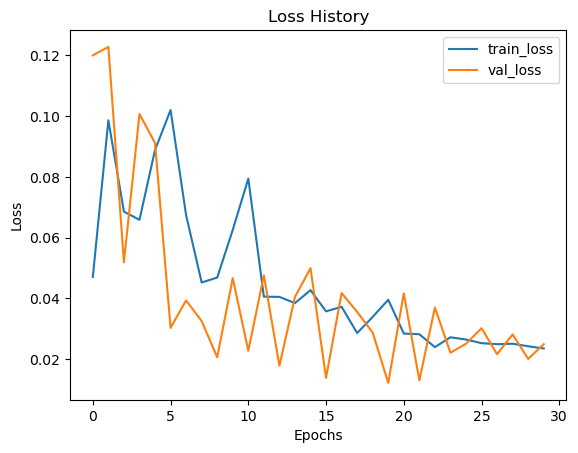

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

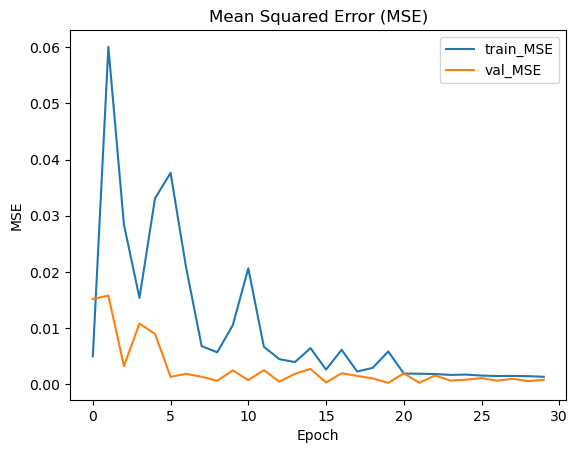

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

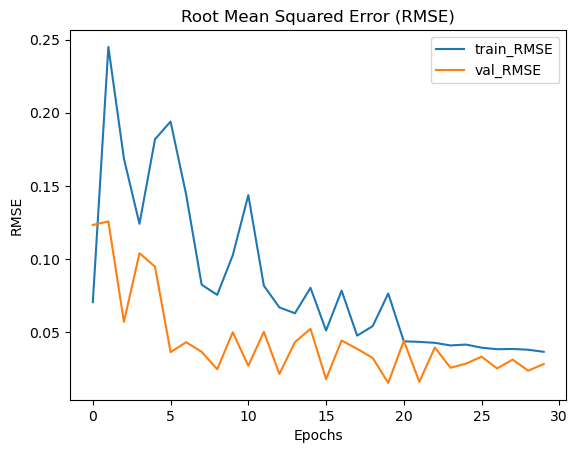

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

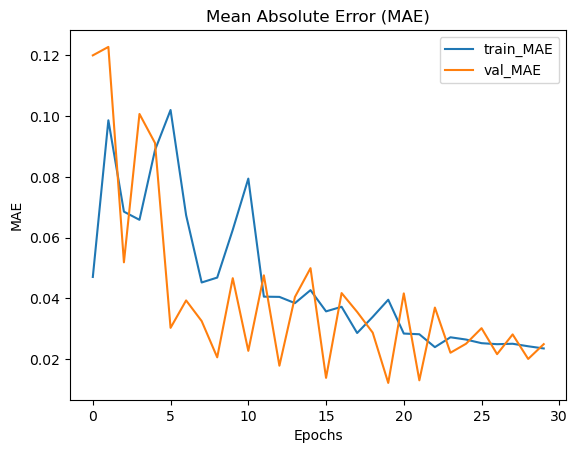

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

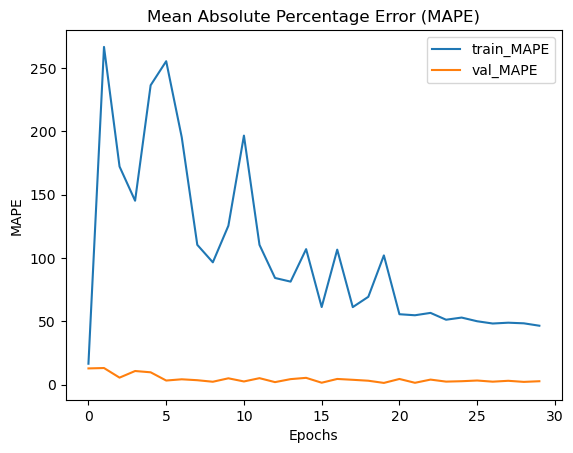

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:07:06.181878: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


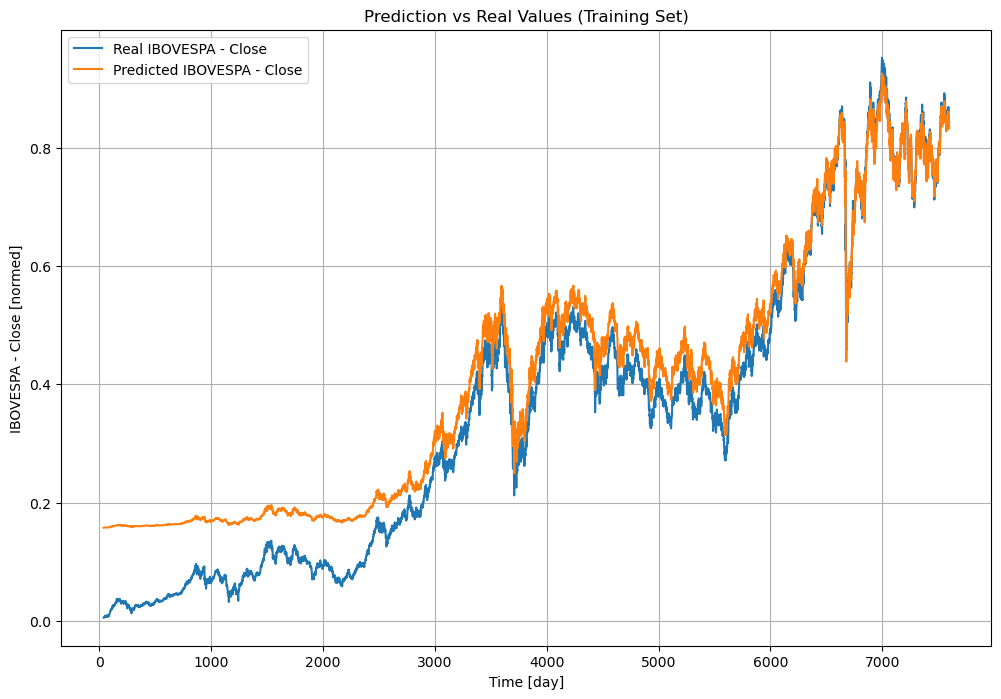

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


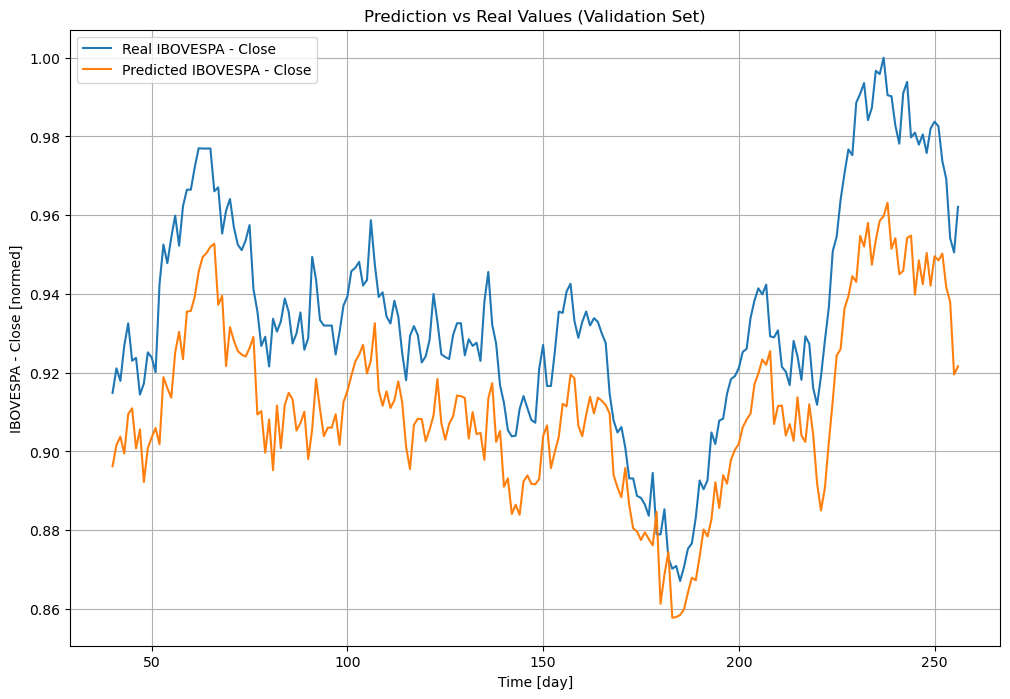

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


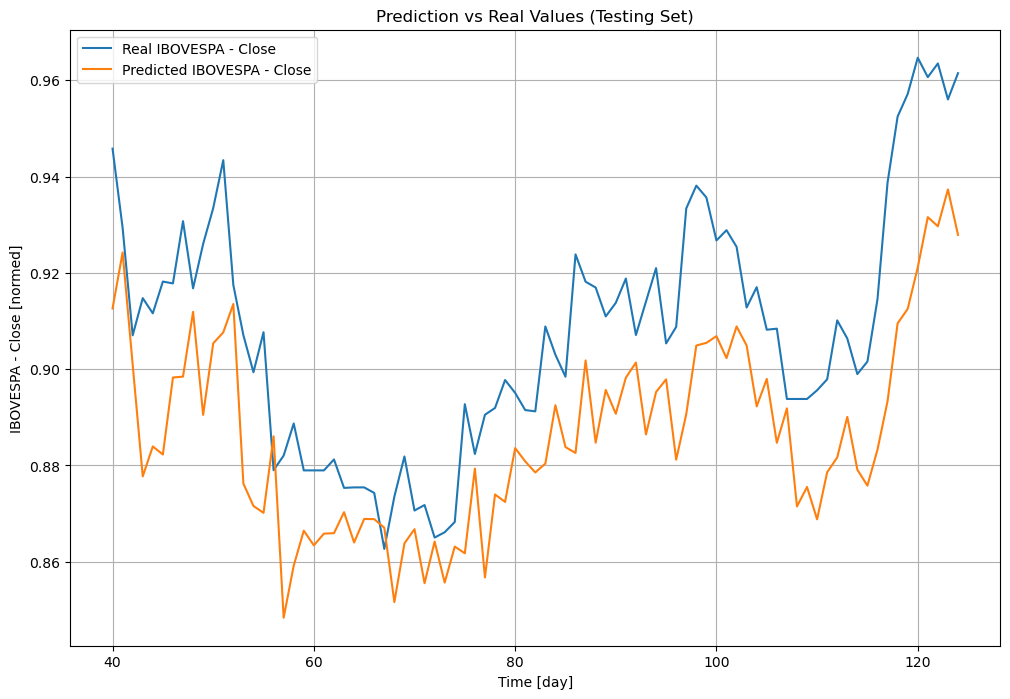

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

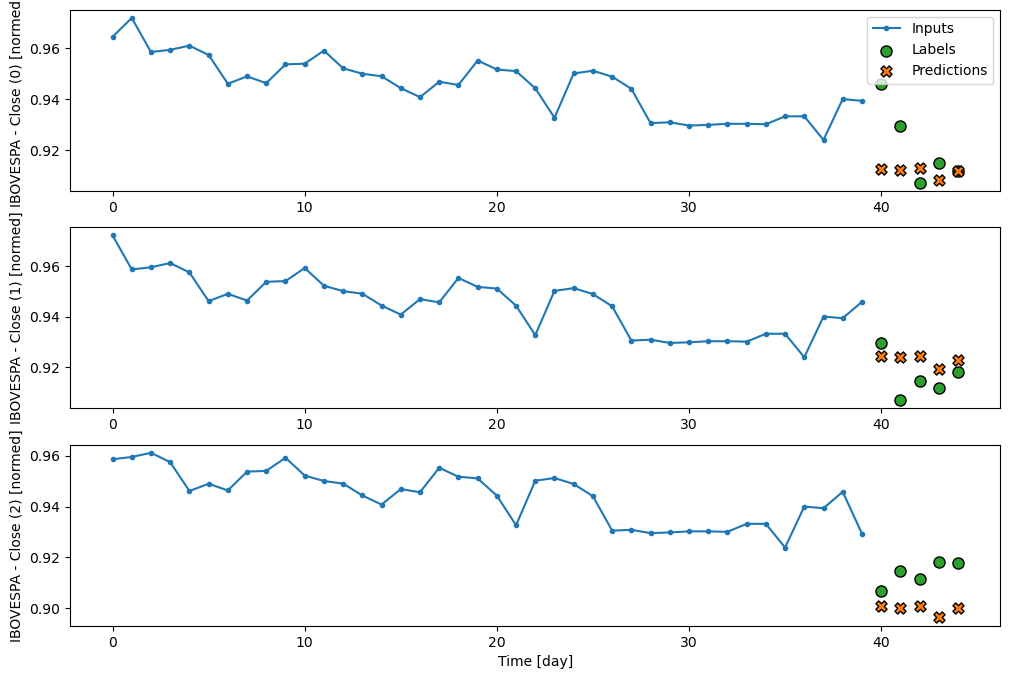

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:45s:938ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


array([[[0.912607  , 0.912607  , 0.912607  , ..., 0.912607  ,
         0.912607  , 0.912607  ],
        [0.91220486, 0.91220486, 0.91220486, ..., 0.91220486,
         0.91220486, 0.91220486],
        [0.912723  , 0.912723  , 0.912723  , ..., 0.912723  ,
         0.912723  , 0.912723  ],
        [0.9079615 , 0.9079615 , 0.9079615 , ..., 0.9079615 ,
         0.9079615 , 0.9079615 ],
        [0.9114951 , 0.9114951 , 0.9114951 , ..., 0.9114951 ,
         0.9114951 , 0.9114951 ]],

       [[0.9242333 , 0.9242333 , 0.9242333 , ..., 0.9242333 ,
         0.9242333 , 0.9242333 ],
        [0.9239109 , 0.9239109 , 0.9239109 , ..., 0.9239109 ,
         0.9239109 , 0.9239109 ],
        [0.92429185, 0.92429185, 0.92429185, ..., 0.92429185,
         0.92429185, 0.92429185],
        [0.919258  , 0.919258  , 0.919258  , ..., 0.919258  ,
         0.919258  , 0.919258  ],
        [0.92286694, 0.92286694, 0.92286694, ..., 0.92286694,
         0.9228669 , 0.9228669 ]],

       [[0.90093577, 0.90093577, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')